# 1. Importação dos Dados

Nessa seção será realizado a importação das bibliotecas em python necessárias para realização da análise exploratória da base de usuários da Netflix (kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset), além de realizar o upload da base de dados exportada no formato de .csv

## 1.1 Importação das Bibliotecas necessárias

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Importação do Database

In [224]:
# Carregar o dataset
file_path = 'BASE - NETFLIX.xlsx'
df = pd.read_excel(file_path)

# 2. Sanitização e Pré-EDA

Nessa seção será realizado a verificação da base de dados a ser explorada, tendo o foco de verificar: a presença de nulos e a presença de outliers; visando tornar os insights a serem extraídos coerentes e representativos da amostra de dados analisada.

Além disso, faremos uma exploração inicial do dataset, a fim de observar: a estrutura dos dados da amostra e o comportamento estatístico macro das variáveis a serem analisadas.

## 2.1. Exploração inicial do Dataset

In [225]:
# Verificar as primeiras linhas do dataset
df.head()

,ID,Tipo de assinatura,Valor da assinatura/mês,Data de adesão,Última data de pagamento,Meses de Ultilizados,País,Idade,Gênero,Dispositivo Utilizado
0,1,Basic,39.9,2022-01-15,2023-06-10,16,Estados Unidos,28,Homem,Smartphone
1,2,Premium,55.9,2021-09-05,2023-06-22,21,Canada,35,Mulher,Tablet
2,3,Standard,18.9,2023-02-28,2023-06-27,3,Reino Unido,42,Homem,Smart TV
3,4,Standard,18.9,2022-07-10,2023-06-26,11,Australia,51,Mulher,Laptop
4,5,Basic,39.9,2023-05-01,2023-06-28,1,Alemanha,33,Homem,Smartphone


## 2.2. Verificar presença de Nulos

In [226]:
# Verificar a presença de valores nulos
df.isnull().sum()

,0
ID,0
Tipo de assinatura,0
Valor da assinatura/mês,0
Data de adesão,0
Última data de pagamento,0
Meses de Ultilizados,0
País,0
Idade,0
Gênero,0
Dispositivo Utilizado,0


Não há nenhum elemento nulo na base de dados!

## 2.3. Verificar presença de Duplicatas

In [227]:
#Checar se há a presença de duplicatas
if df.duplicated().any():
    print("Duplicatas encontradas")
else:
    print("Não foram encontradas duplicatas.")

Não foram encontradas duplicatas.


## 2.4. Verificar a estrutura do Dataset

In [228]:
# Verificar a estrutura do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2500 non-null   int64         
 1   Tipo de assinatura        2500 non-null   object        
 2   Valor da assinatura/mês   2500 non-null   float64       
 3   Data de adesão            2500 non-null   datetime64[ns]
 4   Última data de pagamento  2500 non-null   datetime64[ns]
 5   Meses de Ultilizados      2500 non-null   int64         
 6   País                      2500 non-null   object        
 7   Idade                     2500 non-null   int64         
 8   Gênero                    2500 non-null   object        
 9   Dispositivo Utilizado     2500 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 195.4+ KB


## 2.5. Verificar Outliers

In [229]:
# Define a paleta personalizada
sns.set_palette(['#b20710', '#221f1f', '#e50914', '#732428'])

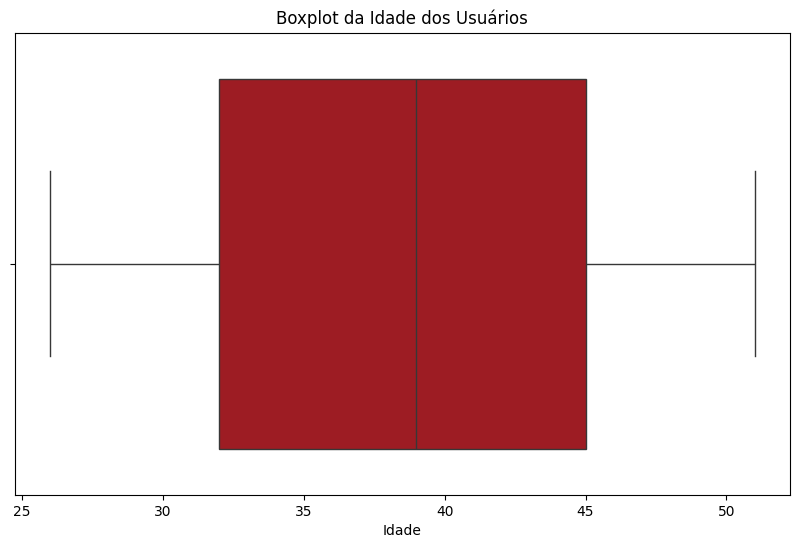

In [230]:
# Boxplot para verificar outliers na idade
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Idade')
plt.title('Boxplot da Idade dos Usuários')
plt.show()

- A base de dados não aparenta ter uma quantidade representativa de outliers fora dos extremos de 25 a 50 anos.
- Apresentando uma maior concentração dos dados entre 32 a 45 anos e com uma mediana em 38 anos.

## 2.6. Estatísticas básicas do Dataset

In [231]:
# Estatísticas descritivas básicas
df.describe()

,ID,Valor da assinatura/mês,Data de adesão,Última data de pagamento,Meses de Ultilizados,Idade
count,2500.00000,2500.000000,2500,2500,2500.000000,2500.000000
mean,1250.50000,38.140000,2022-08-28 18:02:52.800000,2023-07-03 08:54:31.680000,9.680400,38.795600
min,1.00000,18.900000,2021-09-05 00:00:00,2023-06-10 00:00:00,0.000000,26.000000
25%,625.75000,18.900000,2022-07-15 00:00:00,2023-06-29 00:00:00,8.000000,32.000000
50%,1250.50000,39.900000,2022-08-31 00:00:00,2023-07-03 00:00:00,10.000000,39.000000
75%,1875.25000,55.900000,2022-10-17 00:00:00,2023-07-08 00:00:00,11.000000,45.000000
max,2500.00000,55.900000,2023-06-14 00:00:00,2023-07-15 00:00:00,21.000000,51.000000
std,721.83216,14.405548,NaN,NaN,2.068034,7.171778


## 2.7. Estatísticas Adicionais do Dataset

In [232]:
# Definir uma função para calcular estatísticas adicionais
def calculate_additional_statistics(column):

    variance_sample = column.var(ddof=1)  # Variância amostral
    variance_population = column.var(ddof=0)  # Variância populacional
    std_dev_sample = column.std(ddof=1)  # Desvio padrão amostral
    std_dev_population = column.std(ddof=0)  # Desvio padrão populacional
    quartiles = column.quantile([0.25, 0.5, 0.75])

    return {
        'Variância Amostral': variance_sample,
        'Variância Populacional': variance_population,
        'Desvio Padrão Amostral': std_dev_sample,
        'Desvio Padrão Populacional': std_dev_population,
        'Quartis': quartiles
    }

# Calcular estatísticas adicionais para as colunas numéricas
monthly_revenue_stats = calculate_additional_statistics(df['Valor da assinatura/mês'])
age_stats = calculate_additional_statistics(df['Idade'])

# Mostrar resultados
print("\nEstatísticas Adicionais da Receita Mensal:")
for key, value in monthly_revenue_stats.items():
    print(f"{key}:\n{value}\n")

print("\nEstatísticas Adicionais da Idade dos Usuários:")
for key, value in age_stats.items():
    print(f"{key}:\n{value}\n")

descriptive_stats = df.describe()


Estatísticas Adicionais da Receita Mensal:
Variância Amostral:
207.51980792316363

Variância Populacional:
207.43679999999438

Desvio Padrão Amostral:
14.405547817530703

Desvio Padrão Populacional:
14.402666419798605

Quartis:
0.25    18.9
0.50    39.9
0.75    55.9
Name: Valor da assinatura/mês, dtype: float64


Estatísticas Adicionais da Idade dos Usuários:
Variância Amostral:
51.434394397759306

Variância Populacional:
51.4138206400002

Desvio Padrão Amostral:
7.171777631644703

Desvio Padrão Populacional:
7.170343132654128

Quartis:
0.25    32.0
0.50    39.0
0.75    45.0
Name: Idade, dtype: float64



## 2.8. Verificar a Distribuição da Assinatura Mensal

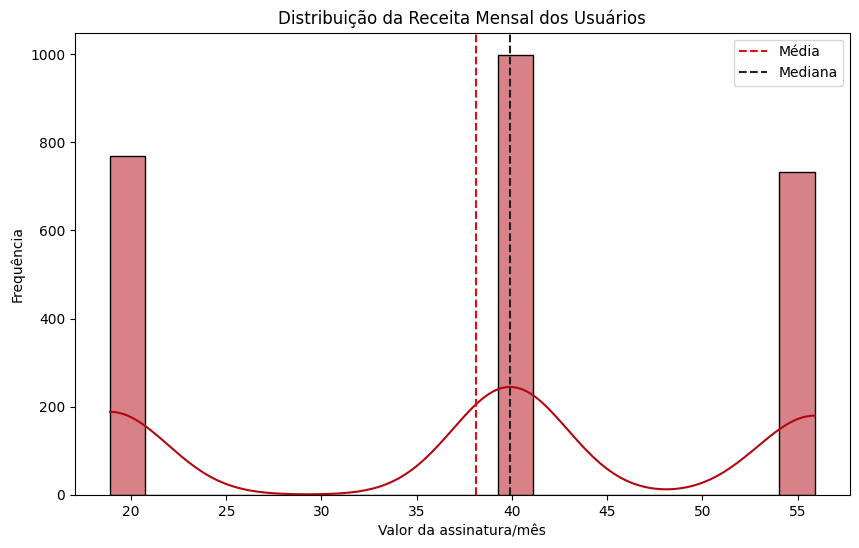

In [234]:
# Visualizar a distribuição da Receita Mensal
sns.set_palette(['#b20710', '#221f1f', '#e50914', '#732428'])
plt.figure(figsize=(10, 6))
sns.histplot(df['Valor da assinatura/mês'], bins=20, kde = True)
plt.title('Distribuição da Receita Mensal dos Usuários')
plt.xlabel('Valor da assinatura/mês')
plt.ylabel('Frequência')
plt.axvline(descriptive_stats.loc['mean', 'Valor da assinatura/mês'], color='#e50914', linestyle='--', label='Média')
plt.axvline(descriptive_stats.loc['50%', 'Valor da assinatura/mês'], color='#221f1f', linestyle='--', label='Mediana')
plt.legend()
plt.show()


This histogram provides insights into the distribution of monthly revenue, which can be useful for analyzing the revenue distribution among users.

## 2.9. Verificar a Distribuição da Idade

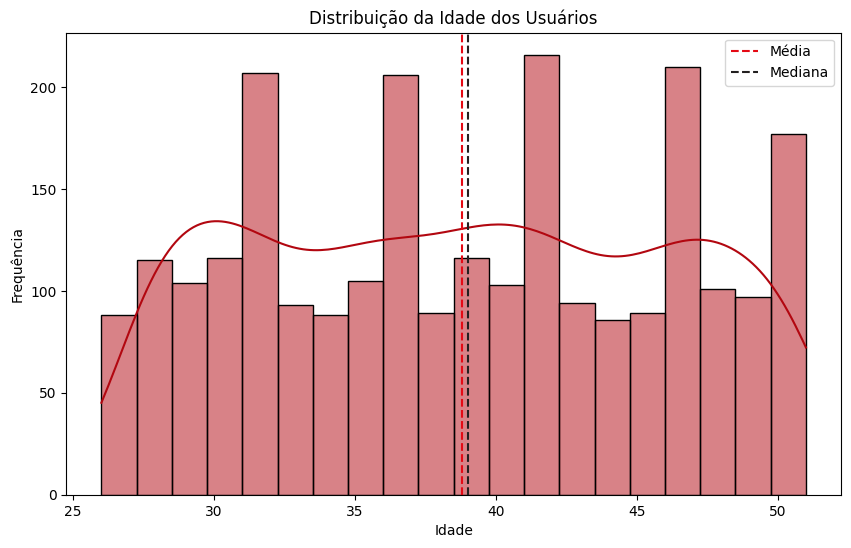

In [235]:
# Visualizar a distribuição da Idade
plt.figure(figsize=(10, 6))
sns.histplot(df['Idade'], bins=20, kde=True)
plt.title('Distribuição da Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.axvline(descriptive_stats.loc['mean', 'Idade'], color='#e50914', linestyle='--', label='Média')
plt.axvline(descriptive_stats.loc['50%', 'Idade'], color='#221f1f', linestyle='--', label='Mediana')
plt.legend()
plt.show()

**Principais Insights**

- 1) Observa-se que 50 anos é a idade mais frequente dos usuários assinantes
- 2) Para as demais faixas etárias se observa um comportamento quase uniforme

# 3. Análise Exploratória

Nessa seção será verificada a distribuição dos usuários da Netflix conforme as seguintes segmentações: país, faixa etária e tipo de assinatura.

## 3.1 Distribuição de usuários por país

**Principais Insights**

- 1) EUA e Espanha se destacam como os países que apresentam o maior volume de usuários assinantes.
- 2) Aparentemente, há uma diferenciação entre os top 3 países em relação aos demais do top 10, de modo que se situam em patamares diferentes de volume de usuários assinantes.

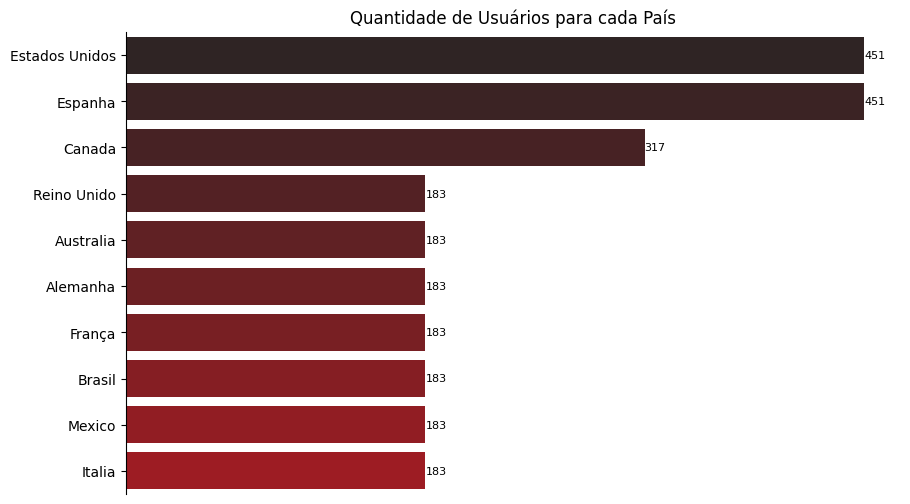

In [236]:
# Contar a quantidade de usuários por país
user_country_counts = df['País'].value_counts()

# Visualizar os países com mais usuários
plt.figure(figsize=(10, 6))
sns.barplot(x=user_country_counts.values, y=user_country_counts.index, hue=user_country_counts.index, palette='dark:#b20710', legend=False)
plt.title('Quantidade de Usuários para cada País')

# Remove a linha inferior e os ticks do eixo x
sns.despine()
ax = plt.gca()
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.ylabel('')

# Adiciona rótulos de dados em cada barra
for i, v in enumerate(user_country_counts.values):
    plt.text(v, i, str(v), color='black', ha='left', va ='center', fontsize=8 )

plt.show()


## 3.2 Distribuição dos usuários por faixa etária

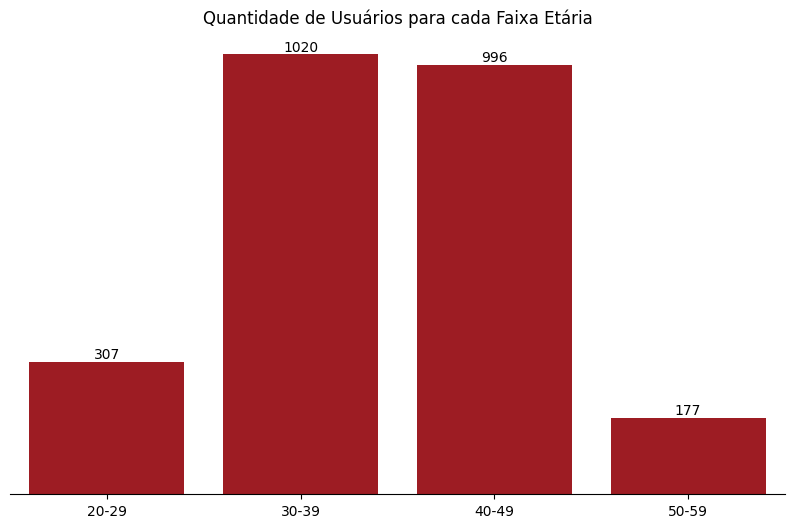

In [237]:
# Definir as faixas etárias e os rótulos
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']

# Criar uma nova coluna 'Faixa Etária' para categorizar as idades
df['Faixa Etária'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Contar o número de usuários em cada faixa etária
age_counts = df['Faixa Etária'].value_counts().sort_index()

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Quantidade de Usuários para cada Faixa Etária')

# Remover a linha inferior e os ticks do eixo x
sns.despine(left=True)
ax.spines['bottom'].set_visible(True)
plt.xticks(rotation=0)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

plt.show()


## 3.3 Distribuição de Usuários por Gênero

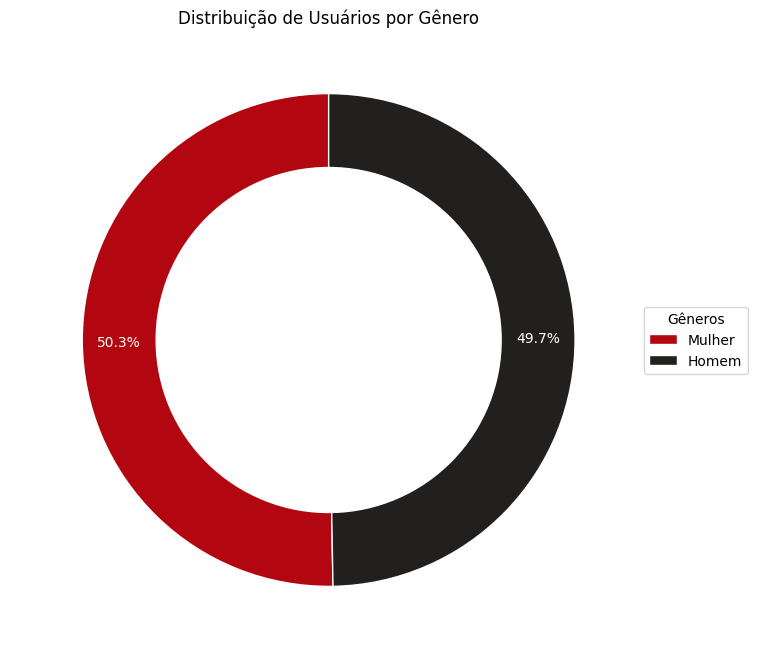

In [258]:
# Contar a quantidade de usuários por gênero
gender_counts = df['Gênero'].value_counts()

# Definir as cores personalizadas
custom_colors = ['#b20710', '#221f1f', '#e50914', '#732428']

# Configurar o gráfico de pizza (donut) com rótulos aprimorados
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
                                    colors=custom_colors, wedgeprops={'width': 0.3, 'edgecolor': 'white'}, # Adicionando edgecolor
                                    pctdistance=0.85, textprops={'fontsize': 10, 'color': 'white'})

# Título do gráfico
plt.title('Distribuição de Usuários por Gênero')

# Adicionar a legenda
plt.legend(wedges, gender_counts.index, title="Gêneros", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Exibir o gráfico
plt.show()


### 3.3 Distribuição de Usuários por Plano de Assinatura

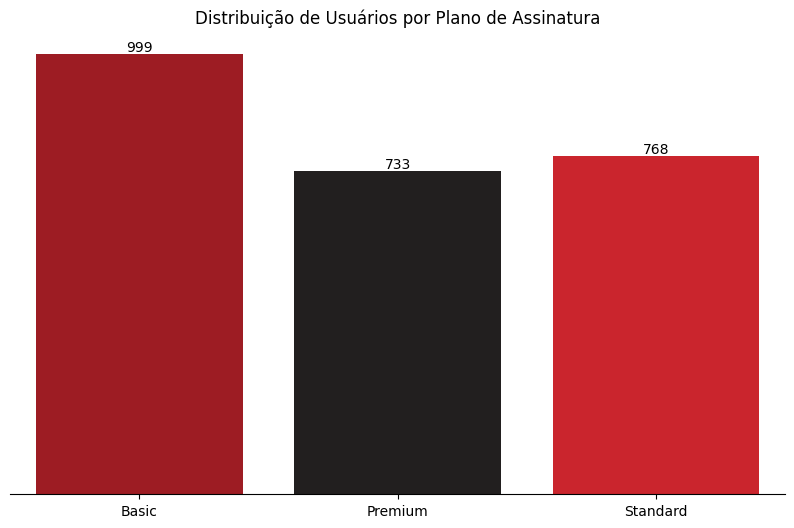

In [261]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Tipo de assinatura', hue='Tipo de assinatura', legend=False)
plt.title('Distribuição de Usuários por Plano de Assinatura')

# Removendo a linha inferior e os ticks do eixo x
sns.despine(left=True)
ax.spines['bottom'].set_visible(False) # Changed 'ay' to 'ax'
ax.spines['bottom'].set_visible(True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

plt.show()

**Principais Insights**

- 1) Plano Básico é o mais assinado entre os usuários
- 2) O plano premium e o plano standard apresentam uma quantidade de usuários semelhante (de modo que podemos dizer que temos dois tipos distintos de clientes e que são igualmente representativos a base de usuários)

## 3.5 Distribuição de Usuários por Dispositivo

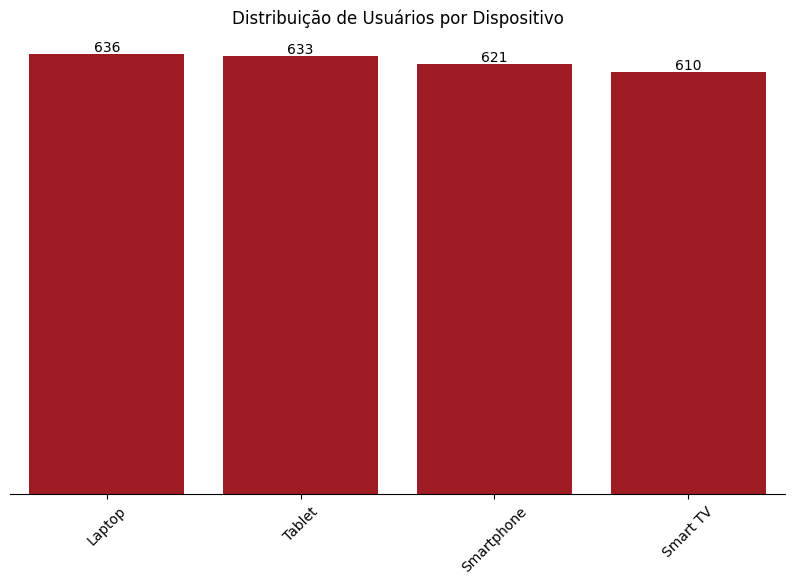

In [260]:
# Contar a quantidade de usuários por dispositivo
device_counts = df['Dispositivo Utilizado'].value_counts()

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=device_counts.index, y=device_counts.values)
plt.title('Distribuição de Usuários por Dispositivo')

# Remover a linha inferior e os ticks do eixo x
sns.despine(left=True)
ax.spines['bottom'].set_visible(True)
plt.xticks(rotation=45)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

plt.show()


## 3.4 Distribuição dos usuários por país e pela idade mais comum (moda da idade)

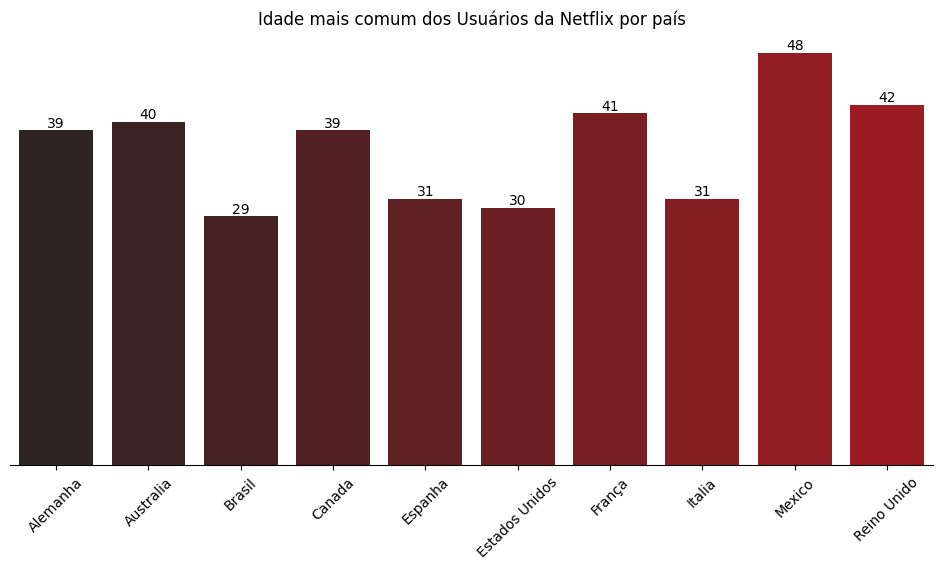

In [262]:
# Calcular a moda da idade dos usuários por país
moda_idade = df.groupby('País')['Idade'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Plotar o gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(data=moda_idade, x='País', y='Idade', hue='País', dodge=False, palette='dark:#b20710')
plt.title('Idade mais comum dos Usuários da Netflix por país')
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Moda da Idade do Usuário (em anos)')
plt.tight_layout()

# Removendo a linha inferior e os ticks do eixo x
sns.despine(left=True)
ax.spines['bottom'].set_visible(False) # Changed ay to ax
ax.spines['bottom'].set_visible(True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

plt.show()

**Principais Insights**

- 1) Observa-se 2 perfis de usuários: jovens-adultos (entre 28 a 32 anos) e adultos (40 a 50 anos).
- 2) O perfil de jovens-adultos está concentrado no Brasil, Itália, Espanha e EUA.
- 3) O perfil de adultos está concentrado em países europeus e com destaque para o México que apresenta o público de assinantes mais velhos dentro desse perfil.

## 3.5 Distribuição dos usuários por país e gênero

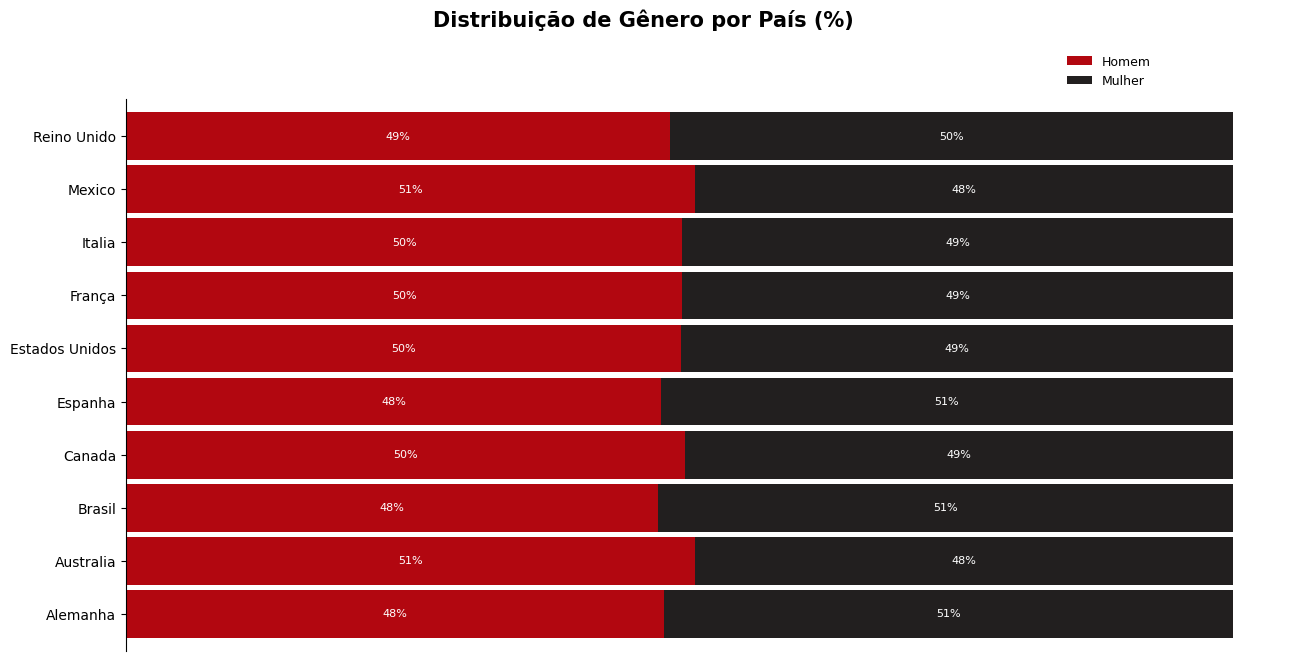

In [266]:
# Agrupando os dados por país e gênero, contando a quantidade de cada gênero
df_agrupado_genero = df.groupby(['País', 'Gênero']).size().unstack()
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Calculando o percentual para que cada país some 100%
df_agrupado_percentual_genero = df_agrupado_genero.div(df_agrupado_genero.sum(axis=1), axis=0) * 100

# Removendo possíveis NaN (se existirem)
df_agrupado_percentual_genero = df_agrupado_percentual_genero.fillna(0)

# Configurando o gráfico de barras empilhadas na horizontal com os valores em porcentagem
df_agrupado_percentual_genero.plot(kind='barh', stacked=True, width=0.9, ax=ax, color=['#b20710', '#221f1f'])  # Ajuste as cores conforme necessário

# Configurações dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])  # Remove os ticks do eixo X
legend = ax.legend(title='', bbox_to_anchor=(0.8, 1.1), loc='upper left', ncol=1, fontsize=9)  # Ajuste a posição conforme necessário
legend.set_frame_on(False)

# Títulos e descrição
fig.text(0.33, 0.89, 'Distribuição de Gênero por País (%)', fontsize=15, fontweight='bold')

# Ajustando o espaço entre o título e o gráfico
plt.subplots_adjust(top=0.80)  # Aumente o valor se precisar de mais espaço

# Removendo a linha superior e inferior
sns.despine(ax=ax, top=True, right=True)  # Remove as bordas superior e direita
ax.spines['bottom'].set_visible(False)  # Mantém a borda inferior invisível
ax.spines['left'].set_visible(True)  # Mantém a borda esquerda visível

# Adicionando rótulos de dados
for index, value in enumerate(df_agrupado_percentual_genero.values):
    cumulative_sum = 0
    for i, val in enumerate(value):
        cumulative_sum += val
        # Verifica se a posição é um número finito antes de adicionar o rótulo
        if pd.notna(val) and val > 0:  # Adiciona rótulo apenas se o valor for positivo
            ax.text(cumulative_sum - val / 2, index, f"{int(val)}%",  # Remove casas decimais
                    va='center', ha='center', fontsize=8, color='white')  # Diminui o tamanho da fonte

# Exibindo o gráfico
plt.show()


**Principais Insights**

- 1) Espanha e Brasil são os principais países que apresentam uma maior concentração de assinantes do gênero feminino do que masculino. Além de serem os países de maior preponderência de assinantes jovens-adultos.
- 2) México e Austrália são os principais países que apresentam uma maior concentração de assinantes do gênero masculino do que feminino. Além de serem os países de maior preponderência de assinantes adultos.

## 3.6 Distribuição do Tipo de Assinatura por País

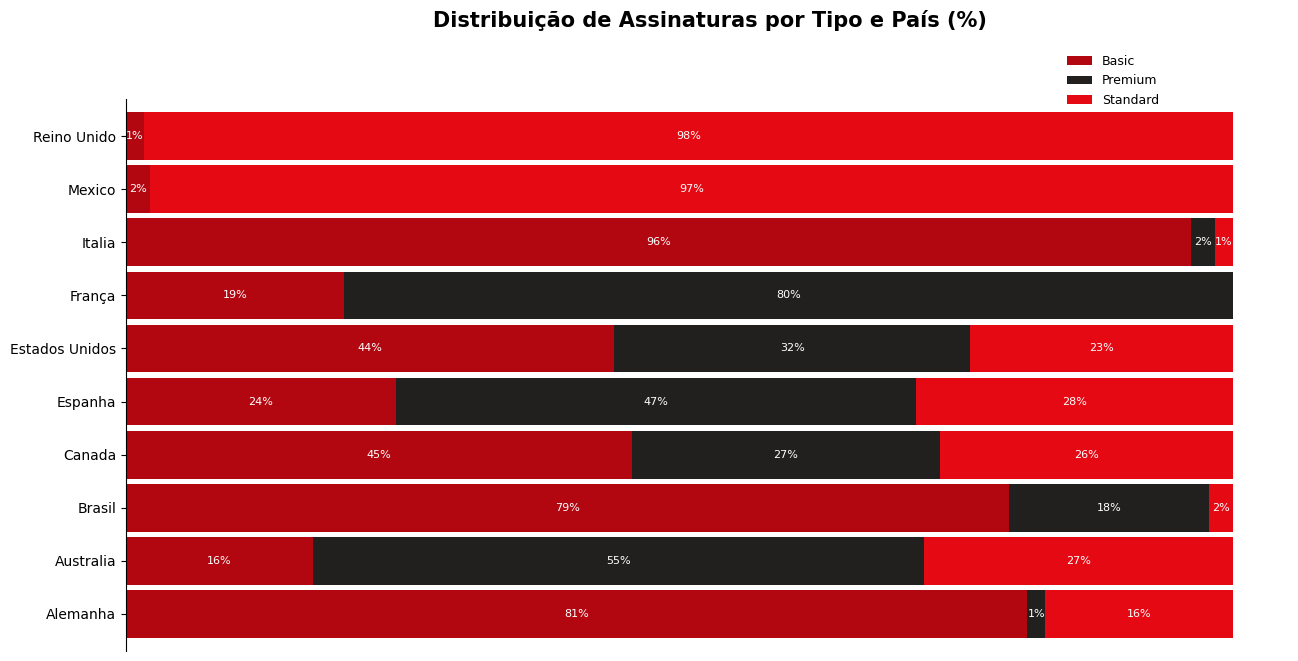

In [221]:
# Agrupando os dados por país e tipo de assinatura, contando a quantidade de cada tipo
df_agrupado = df.groupby(['País', 'Tipo de assinatura']).size().unstack()
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Calculando o percentual para que cada país some 100%
df_agrupado_percentual = df_agrupado.div(df_agrupado.sum(axis=1), axis=0) * 100

# Removendo possíveis NaN (se existirem)
df_agrupado_percentual = df_agrupado_percentual.fillna(0)

# Configurando o gráfico de barras empilhadas na horizontal com os valores em porcentagem
df_agrupado_percentual.plot(kind='barh', stacked=True, width=0.9, ax=ax, color=['#b20710', '#221f1f', '#e50914', '#732428'])

# Configurações dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])  # Remove os ticks do eixo X
legend = ax.legend(title='', bbox_to_anchor=(0.8, 1.1), loc='upper left', ncol=1, fontsize=9)  # Ajuste a posição conforme necessário
legend.set_frame_on(False)


# Títulos e descrição
fig.text(0.33, 0.89, 'Distribuição de Assinaturas por Tipo e País (%)', fontsize=15, fontweight='bold')

# Ajustando o espaço entre o título e o gráfico
plt.subplots_adjust(top=0.80)  # Aumente o valor se precisar de mais espaço

# Removendo a linha superior e inferior
sns.despine(ax=ax, top=True, right=True)  # Remove as bordas superior e direita
ax.spines['bottom'].set_visible(False)  # Mantém a borda inferior invisível
ax.spines['left'].set_visible(True)  # Mantém a borda esquerda visível

# Adicionando rótulos de dados
for index, value in enumerate(df_agrupado_percentual.values):
    cumulative_sum = 0
    for i, val in enumerate(value):
        cumulative_sum += val
        # Verifica se a posição é um número finito antes de adicionar o rótulo
        if pd.notna(val) and val > 0:  # Adiciona rótulo apenas se o valor for positivo
            ax.text(cumulative_sum - val / 2, index, f"{int(val)}%",  # Remove casas decimais
                    va='center', ha='center', fontsize=8, color='white')  # Diminui o tamanho da fonte

# Exibindo o gráfico
plt.show()


**Principais Insights**

- 1) Espanha e França: quantidade significativa de assinantes Premium.
- 2) Brasil: uma quantidade maior de usuários do plano Basic
- 3) Alemanha e Itália: alto número de assinantes Basic
- 4) Reino Unido e México: alta adesão da assinatura Standard
- 5) Estados Unidos e Canadá: distribuição equilibrada entre os planos

## 3.6 Distribuição do Tipo de Dispositivo por País

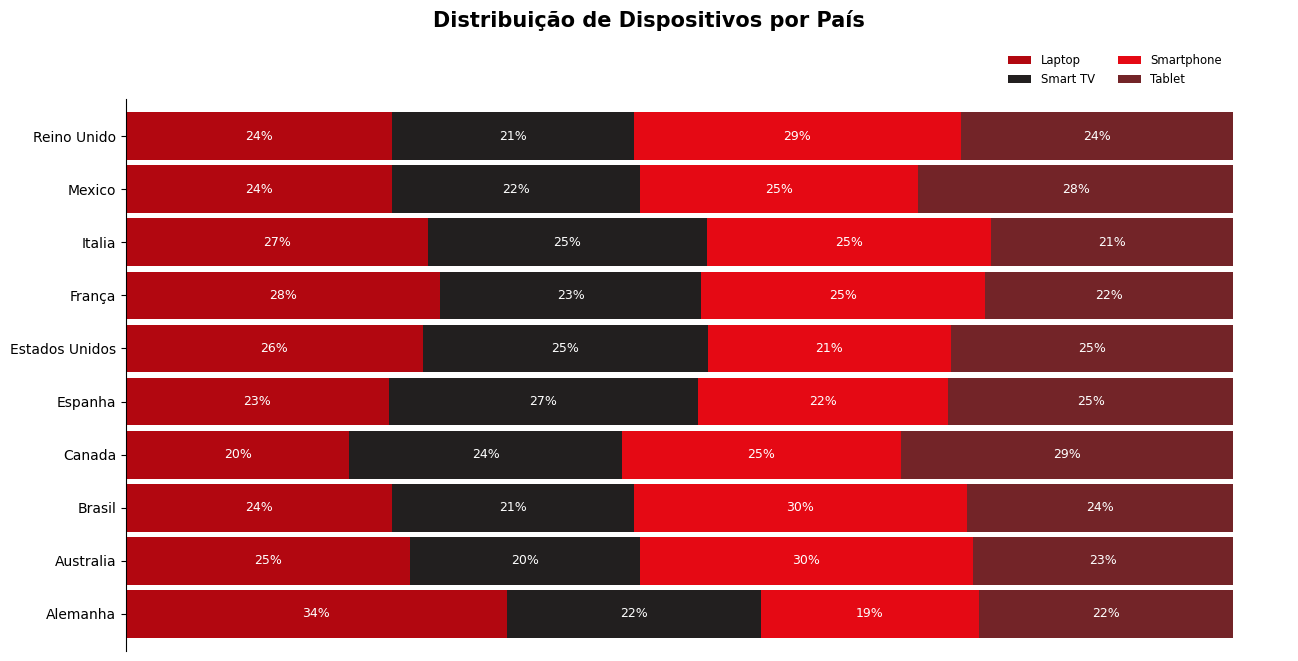

In [220]:
# Agrupando os dados por país e tipo de dispositivo, contando a quantidade de cada tipo
df_agrupado_dispositivo = df.groupby(['País', 'Dispositivo Utilizado']).size().unstack()
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Calculando o percentual para que cada país some 100%
df_agrupado_percentual_dispositivo = df_agrupado_dispositivo.div(df_agrupado_dispositivo.sum(axis=1), axis=0) * 100

# Removendo possíveis NaN (se existirem)
df_agrupado_percentual_dispositivo = df_agrupado_percentual_dispositivo.fillna(0)

# Configurando o gráfico de barras empilhadas na horizontal com os valores em porcentagem
df_agrupado_percentual_dispositivo.plot(kind='barh', stacked=True, width=0.9, ax=ax, color=['#b20710', '#221f1f', '#e50914', '#732428'])

# Configurações dos eixos
ax.set_xlabel('')
ax.set_ylabel('')  # Remove o título do eixo Y
ax.set_xticks([])  # Remove os ticks do eixo X
legend = ax.legend(title=None, fontsize='small', bbox_to_anchor=(0.75, 1.1), loc='upper left', ncol=2)  # Ajuste a posição conforme necessário
legend.set_frame_on(False)

# Títulos e descrição
fig.text(0.33, 0.89, 'Distribuição de Dispositivos por País', fontsize=15, fontweight='bold')

# Ajustando o espaço entre o título e o gráfico
plt.subplots_adjust(top=0.80)  # Aumente o valor se precisar de mais espaço

# Removendo a linha superior e inferior
sns.despine(ax=ax, top=True, right=True)  # Remove as bordas superior e direita
ax.spines['bottom'].set_visible(False)  # Mantém a borda inferior invisível
ax.spines['left'].set_visible(True)  # Mantém a borda esquerda visível

# Adicionando rótulos de dados
for index, value in enumerate(df_agrupado_percentual_dispositivo.values):
    cumulative_sum = 0
    for i, val in enumerate(value):
        cumulative_sum += val
        # Verifica se a posição é um número finito antes de adicionar o rótulo
        if pd.notna(val) and val > 0:  # Adiciona rótulo apenas se o valor for positivo
            ax.text(cumulative_sum - val / 2, index, f"{int(val)}%",  # Remove casas decimais
                    va='center', ha='center', fontsize=9, color='white')  # Diminui o tamanho da fonte

# Exibindo o gráfico
plt.show()

**Principais Insights**
- 1)

## 3.7 Distribuição dos usuários por gênero e tipo de assinatura

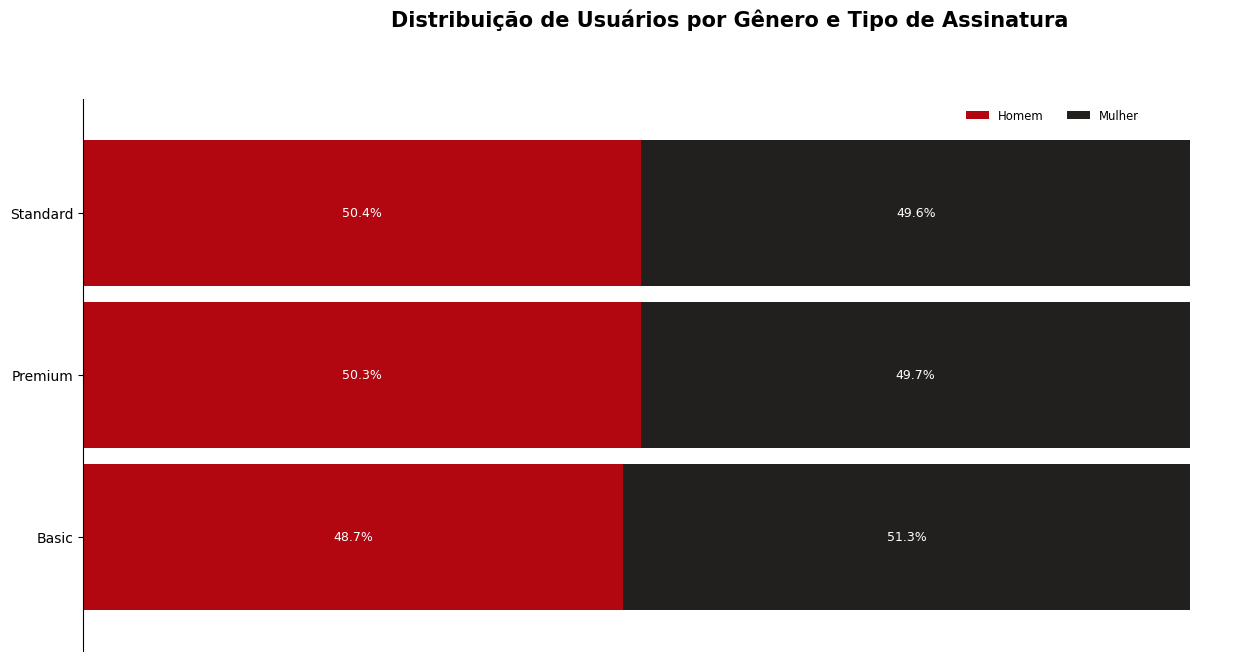

In [272]:
# Agrupando os dados por tipo de assinatura e gênero, contando a quantidade de cada tipo
df_agrupado = df.groupby(['Tipo de assinatura', 'Gênero']).size().unstack()
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Calculando o percentual para que cada tipo de assinatura some 100%
df_agrupado_percentual = df_agrupado.div(df_agrupado.sum(axis=1), axis=0) * 100

# Removendo possíveis NaN (se existirem)
df_agrupado_percentual = df_agrupado_percentual.fillna(0)

# Configurando o gráfico de barras empilhadas na horizontal com os valores em porcentagem
df_agrupado_percentual.plot(kind='barh', stacked=True, width=0.9, ax=ax, color=['#b20710', '#221f1f'])

# Configurações dos eixos
ax.set_xlabel('')
ax.set_ylabel('')  # Remove o título do eixo Y
ax.set_xticks([])  # Remove os ticks do eixo X
legend = ax.legend(title=None, fontsize='small', bbox_to_anchor=(0.75, 1.0), loc='upper left', ncol=2)  # Ajuste a posição conforme necessário
legend.set_frame_on(False)

# Títulos e descrição
fig.text(0.33, 0.89, 'Distribuição de Usuários por Gênero e Tipo de Assinatura', fontsize=15, fontweight='bold')

# Ajustando o espaço entre o título e o gráfico
plt.subplots_adjust(top=0.80)  # Aumente o valor se precisar de mais espaço

# Removendo a linha superior e inferior
sns.despine(ax=ax, top=True, right=True)  # Remove as bordas superior e direita
ax.spines['bottom'].set_visible(False)  # Mantém a borda inferior invisível
ax.spines['left'].set_visible(True)  # Mantém a borda esquerda visível

# Adicionando rótulos de dados
for index, value in enumerate(df_agrupado_percentual.values):
    cumulative_sum = 0
    for i, val in enumerate(value):
        cumulative_sum += val
        # Verifica se a posição é um número finito antes de adicionar o rótulo
        if pd.notna(val) and val > 0:  # Adiciona rótulo apenas se o valor for positivo
            ax.text(cumulative_sum - val / 2, index, f"{val:.1f}%",  # Formato percentual
                    va='center', ha='center', fontsize=9, color='white')  # Cor do texto

# Exibindo o gráfico
plt.show()


**Principais Insights**

- 1) Não se observa uma distinção significativa de gênero entre os tipos de assinatura

## 3.8 Distribuição da Receita Mensal (%) por Tipo de Assinatura para cada País

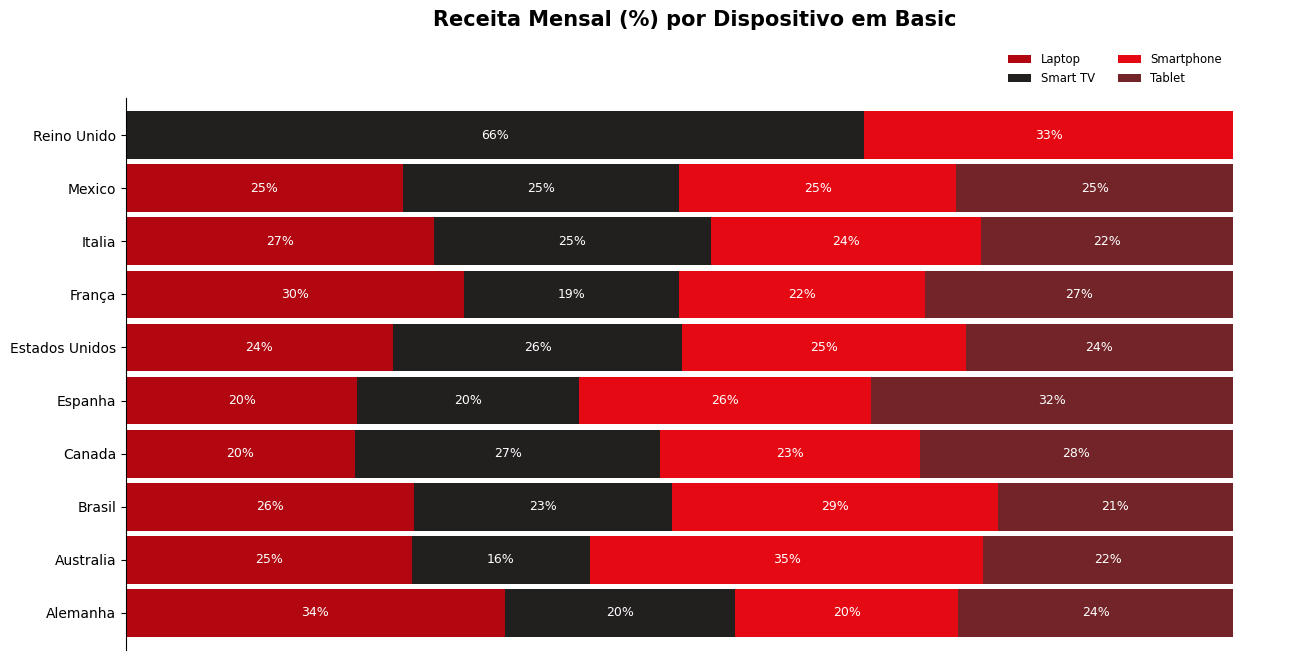

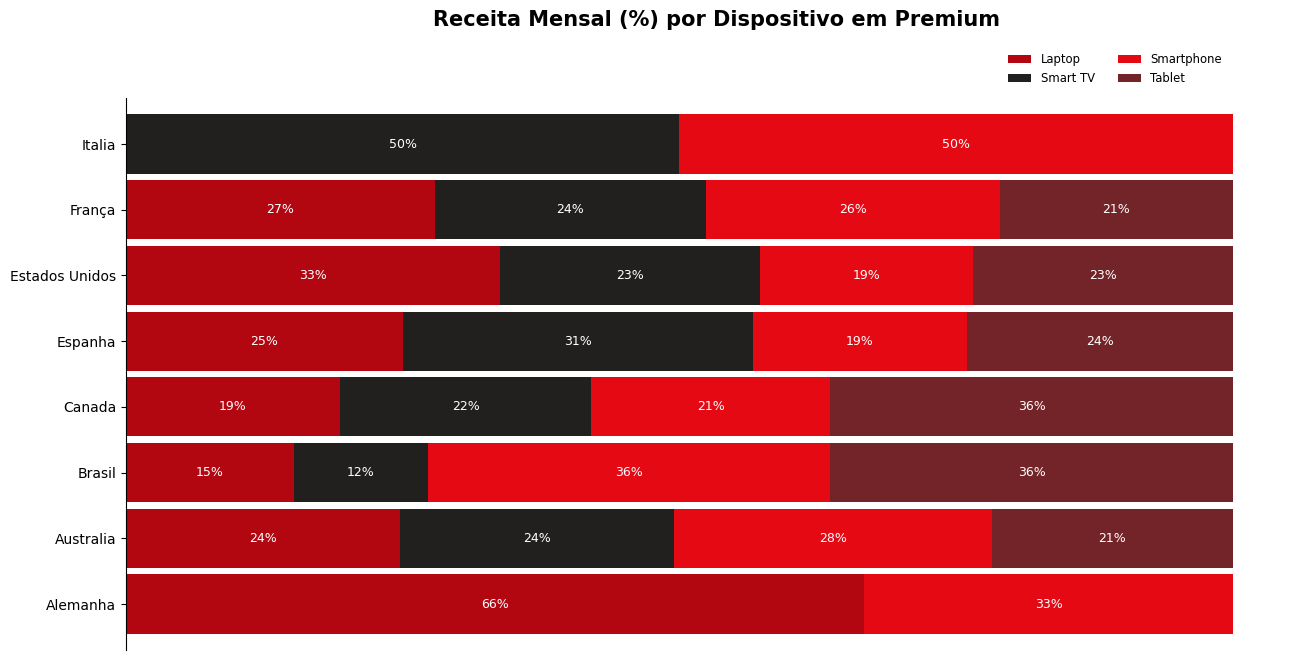

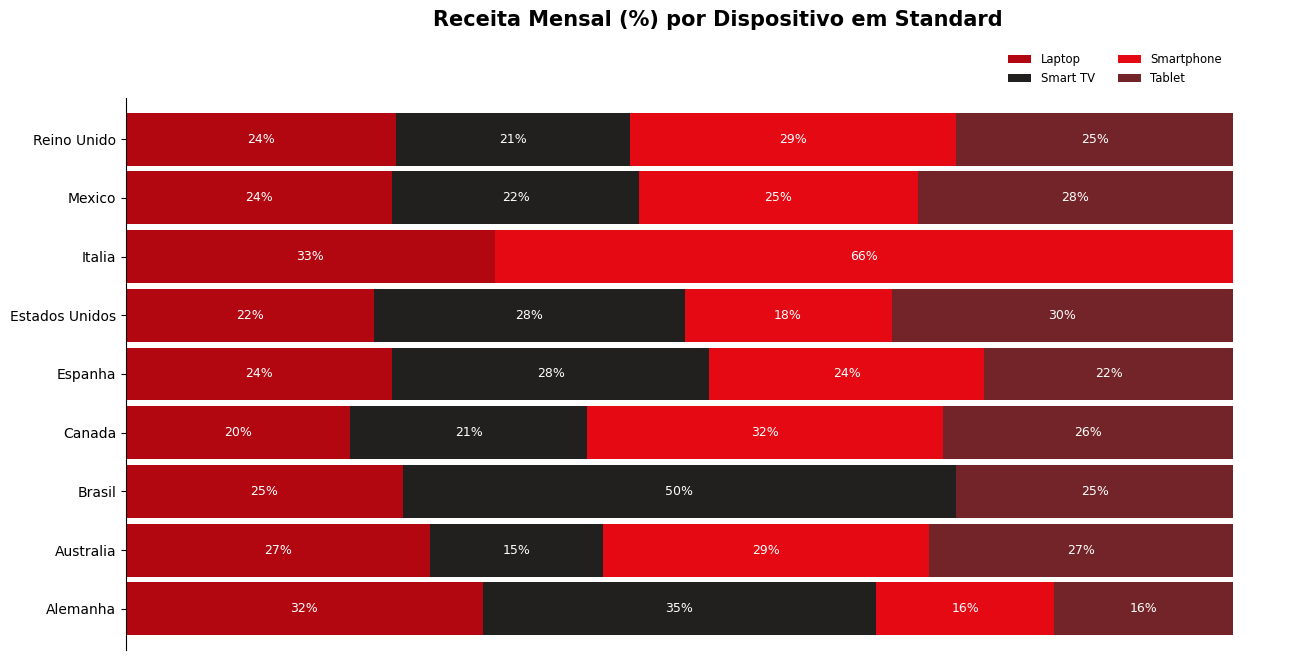

In [185]:
# Certifique-se de que os tipos de dados estão corretos
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)

# Obter uma lista de tipos de assinatura únicos
tipos_assinatura_unicos = df['Tipo de assinatura'].unique()

# Criar um gráfico para cada tipo de assinatura
for tipo_assinatura in tipos_assinatura_unicos:
    # Filtrar os dados para o tipo de assinatura atual
    df_tipo_assinatura = df[df['Tipo de assinatura'] == tipo_assinatura]

    # Agrupando por país e tipo de dispositivo, somando a receita mensal
    receita_mensal = df_tipo_assinatura.groupby(['País', 'Dispositivo Utilizado'])['Valor da assinatura/mês'].sum().unstack()

    # Calculando o percentual para que cada país some 100%
    receita_percentual = receita_mensal.div(receita_mensal.sum(axis=1), axis=0) * 100

    # Removendo possíveis NaN (se existirem)
    receita_percentual = receita_percentual.fillna(0)

    # Configurando o gráfico
    fig, ax = plt.subplots(figsize=(15, 8))

    # Configurando o gráfico de barras empilhadas na horizontal com os valores em porcentagem
    receita_percentual.plot(kind='barh', stacked=True, width=0.9, ax=ax, color=['#b20710', '#221f1f', '#e50914', '#732428'])

    # Configurações dos eixos
    ax.set_xlabel('')
    ax.set_ylabel('')  # Remove o título do eixo Y
    ax.set_xticks([])  # Remove os ticks do eixo X
    legend = ax.legend(title=None, fontsize='small', bbox_to_anchor=(0.75, 1.1), loc='upper left', ncol=2)  # Ajuste a posição conforme necessário
    legend.set_frame_on(False)

    # Títulos e descrição
    fig.text(0.33, 0.89, f'Receita Mensal (%) por Dispositivo em {tipo_assinatura}', fontsize=15, fontweight='bold')

    # Ajustando o espaço entre o título e o gráfico
    plt.subplots_adjust(top=0.80)  # Aumente o valor se precisar de mais espaço

    # Removendo a linha superior e inferior
    sns.despine(ax=ax, top=True, right=True)  # Remove as bordas superior e direita
    ax.spines['bottom'].set_visible(False)  # Mantém a borda inferior invisível
    ax.spines['left'].set_visible(True)  # Mantém a borda esquerda visível

    # Adicionando rótulos de dados
    for index, value in enumerate(receita_percentual.values):
        cumulative_sum = 0
        for i, val in enumerate(value):
            cumulative_sum += val
            # Verifica se a posição é um número finito antes de adicionar o rótulo
            if pd.notna(val) and val > 0:  # Adiciona rótulo apenas se o valor for positivo
                ax.text(cumulative_sum - val / 2, index, f"{int(val)}%",  # Remove casas decimais
                        va='center', ha='center', fontsize=9, color='white')  # Diminui o tamanho da fonte

    # Exibindo o gráfico
    plt.show()


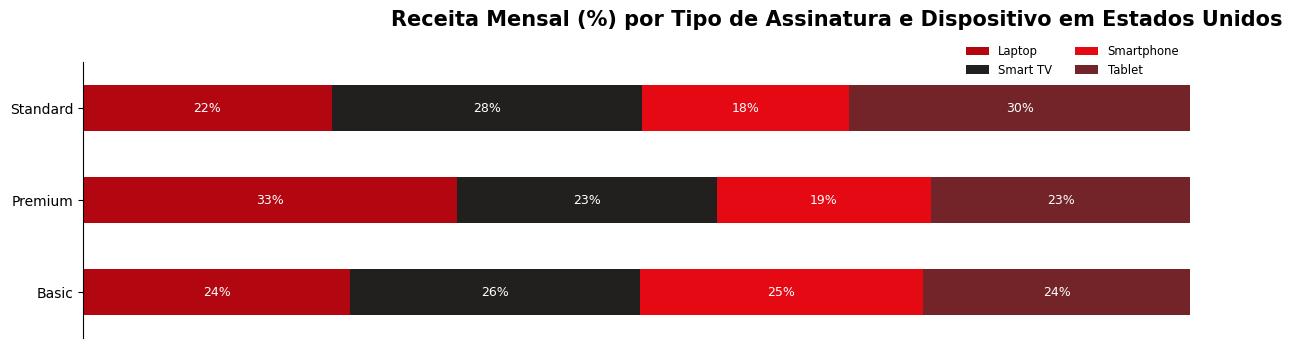

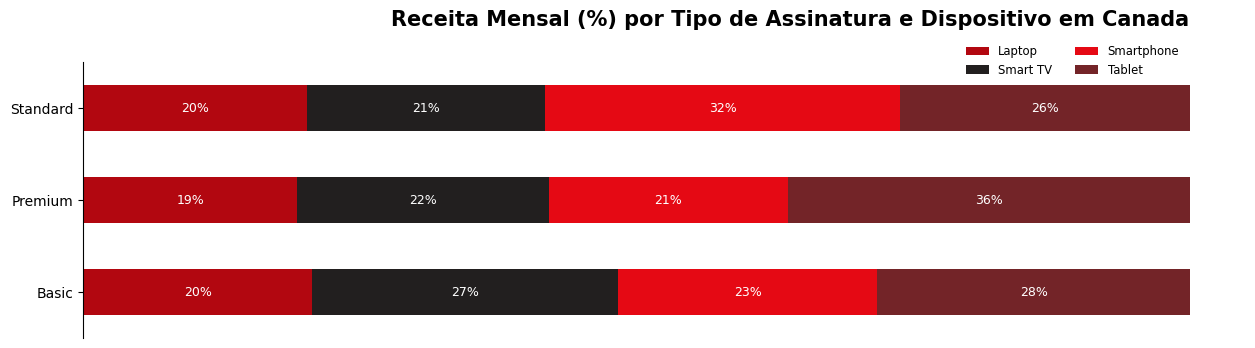

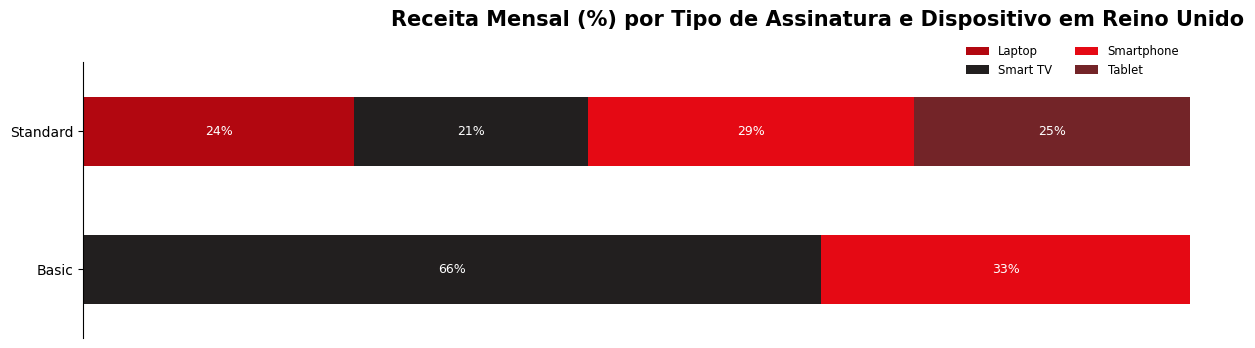

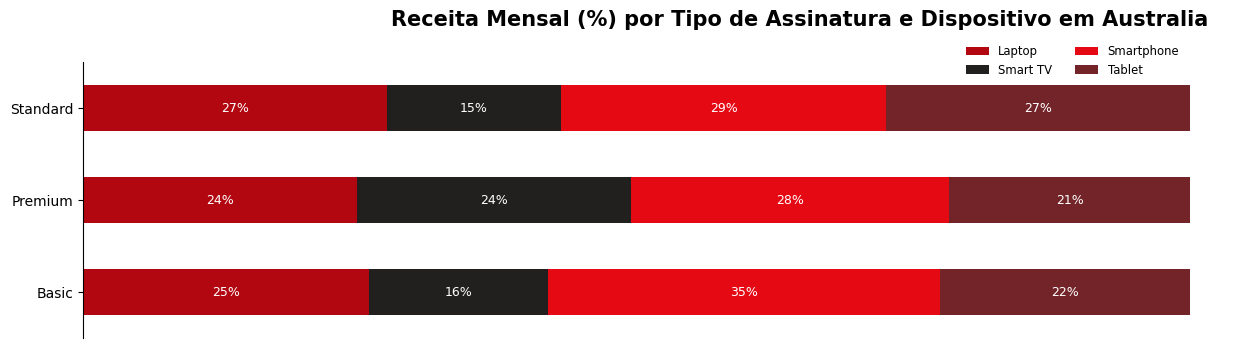

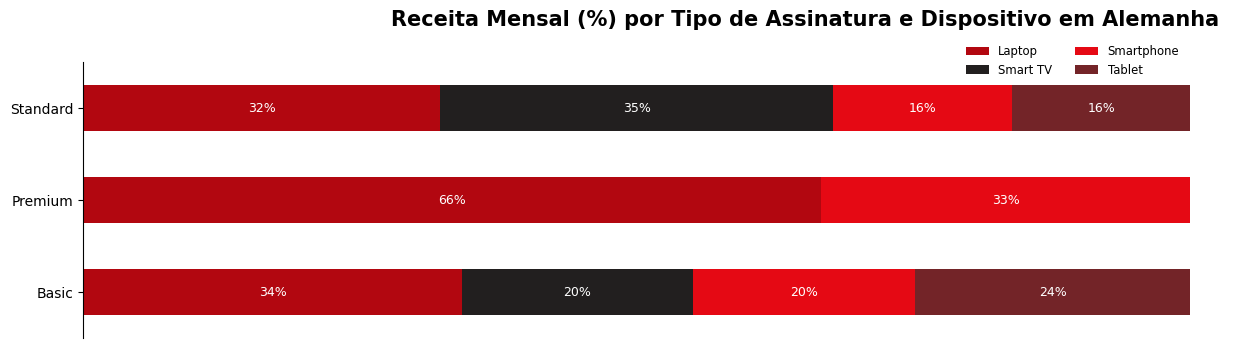

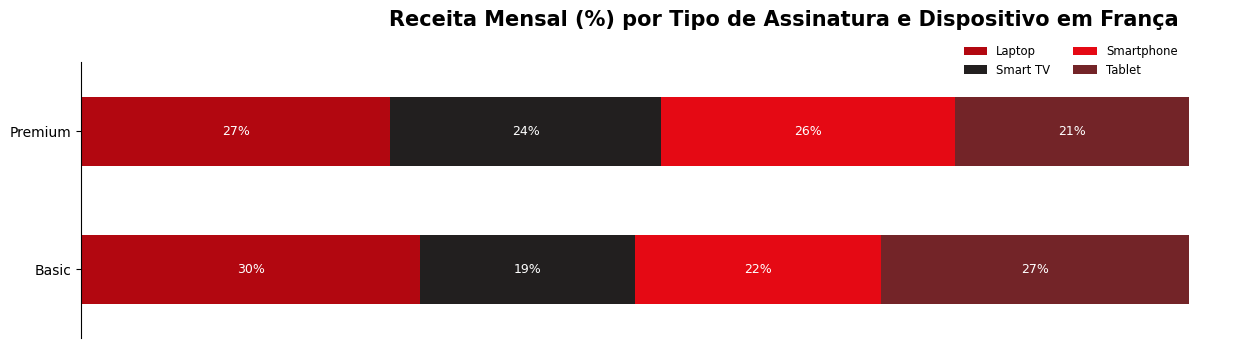

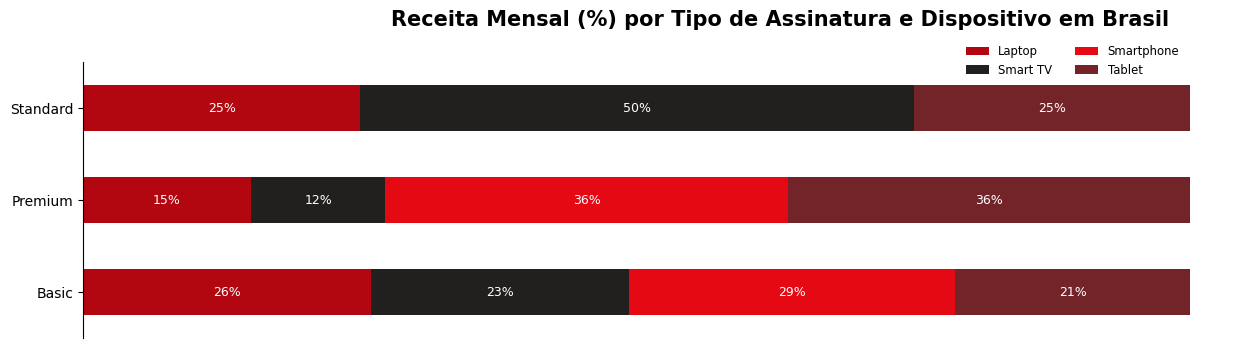

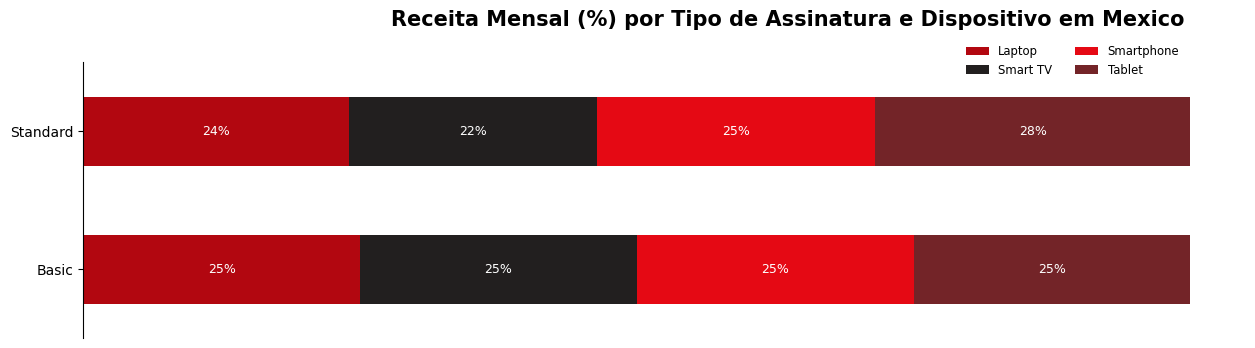

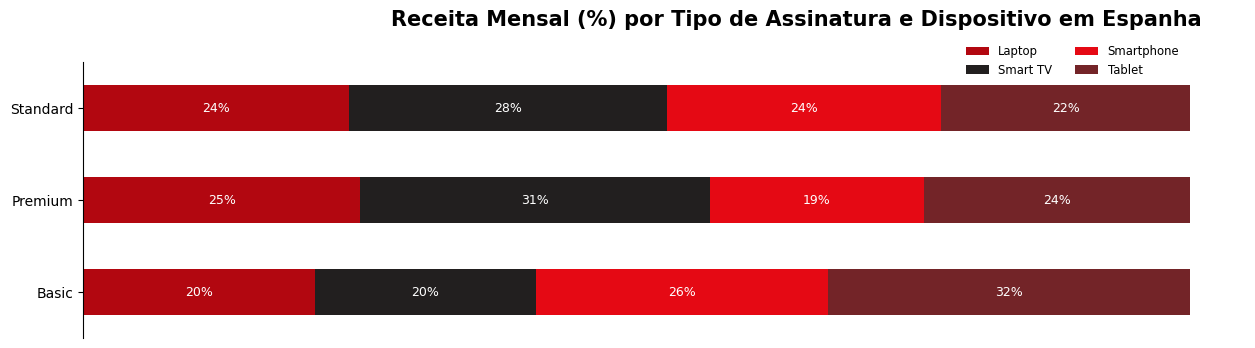

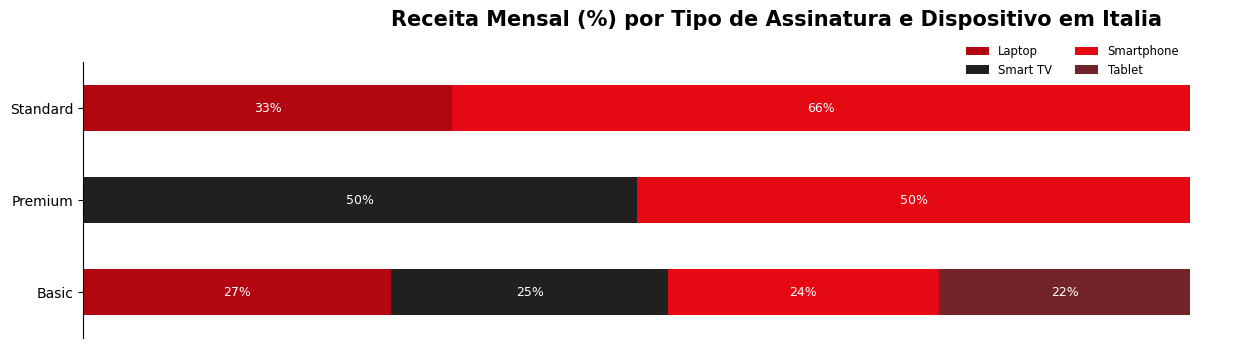

In [219]:
# Certifique-se de que os tipos de dados estão corretos
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)

# Obter uma lista de países únicos
paises_unicos = df['País'].unique()

# Criar um gráfico para cada país
for pais in paises_unicos:
    # Filtrar os dados para o país atual
    df_pais = df[df['País'] == pais]

    # Agrupando por tipo de assinatura e tipo de dispositivo, somando a receita mensal
    receita_mensal = df_pais.groupby(['Tipo de assinatura', 'Dispositivo Utilizado'])['Valor da assinatura/mês'].sum().unstack()

    # Calculando o percentual para que cada tipo de assinatura some 100%
    receita_percentual = receita_mensal.div(receita_mensal.sum(axis=1), axis=0) * 100

    # Removendo possíveis NaN (se existirem)
    receita_percentual = receita_percentual.fillna(0)

    # Configurando o gráfico
    fig, ax = plt.subplots(figsize=(15, 4))

    # Configurando o gráfico de barras empilhadas na horizontal com os valores em porcentagem
    receita_percentual.plot(kind='barh', stacked=True, width=0.5, ax=ax, color=['#b20710', '#221f1f', '#e50914', '#732428'])

    # Configurações dos eixos
    ax.set_xlabel('')
    ax.set_ylabel('')  # Remove o título do eixo Y
    ax.set_xticks([])  # Remove os ticks do eixo X
    legend = ax.legend(title=None, fontsize='small', bbox_to_anchor=(0.75, 1.1), loc='upper left', ncol=2)  # Ajuste a posição conforme necessário
    legend.set_frame_on(False)

    # Títulos e descrição
    fig.text(0.33, 0.89, f'Receita Mensal (%) por Tipo de Assinatura e Dispositivo em {pais}', fontsize=15, fontweight='bold')

    # Ajustando o espaço entre o título e o gráfico
    plt.subplots_adjust(top=0.80)  # Aumente o valor se precisar de mais espaço

    # Removendo a linha superior e inferior
    sns.despine(ax=ax, top=True, right=True)  # Remove as bordas superior e direita
    ax.spines['bottom'].set_visible(False)  # Mantém a borda inferior invisível
    ax.spines['left'].set_visible(True)  # Mantém a borda esquerda visível

    # Adicionando rótulos de dados
    for index, value in enumerate(receita_percentual.values):
        cumulative_sum = 0
        for i, val in enumerate(value):
            cumulative_sum += val
            # Verifica se a posição é um número finito antes de adicionar o rótulo
            if pd.notna(val) and val > 0:  # Adiciona rótulo apenas se o valor for positivo
                ax.text(cumulative_sum - val / 2, index, f"{int(val)}%",  # Remove casas decimais
                        va='center', ha='center', fontsize=9, color='white')  # Diminui o tamanho da fonte

    # Exibindo o gráfico
    plt.show()


## 3.9 Valor Médio da Assinatura por País

**Principais Insights**

- Itália e o Reino Unido têm os maiores valores de LTV, o que pode indicar uma maior disposição dos usuários nesses países a gastar com o serviço. Já o México apresenta o menor valor.




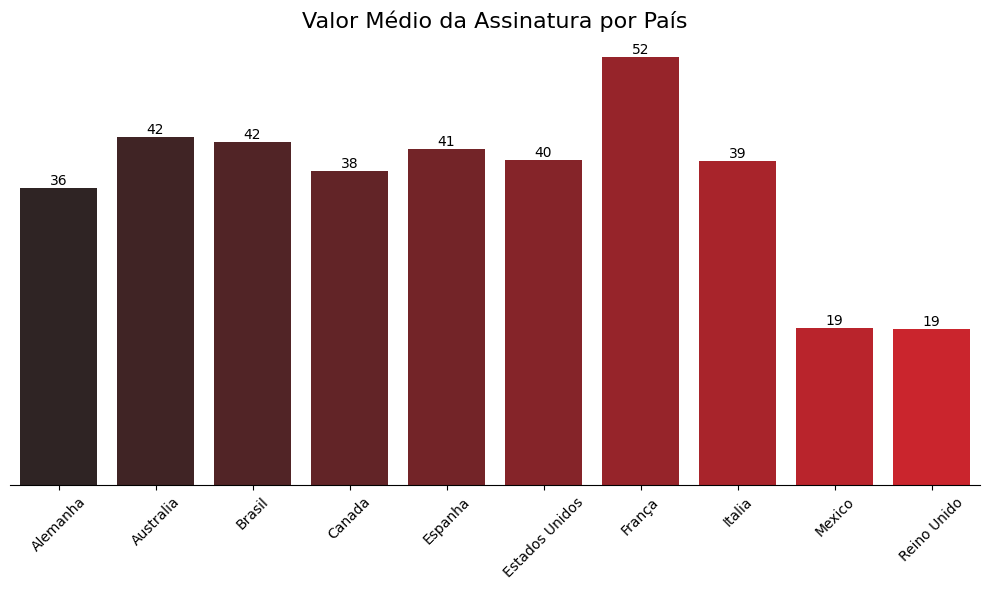

In [274]:
# Calcular o LTV (média da receita mensal)
ltv_per_country = df.groupby('País')['Valor da assinatura/mês'].mean()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
ax = sns.barplot(x=ltv_per_country.index, y=ltv_per_country.values, hue=ltv_per_country.index, dodge=False, palette='dark:#e50914')

# Configurar títulos e rótulos dos eixos
plt.title('Valor Médio da Assinatura por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Valor Médio da Assinatura', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Removendo a linha inferior e os ticks do eixo x
sns.despine(left=True)
ax.spines['bottom'].set_visible(True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()


## 3.10 Life Time Value Médio por Tipo de Assinatura

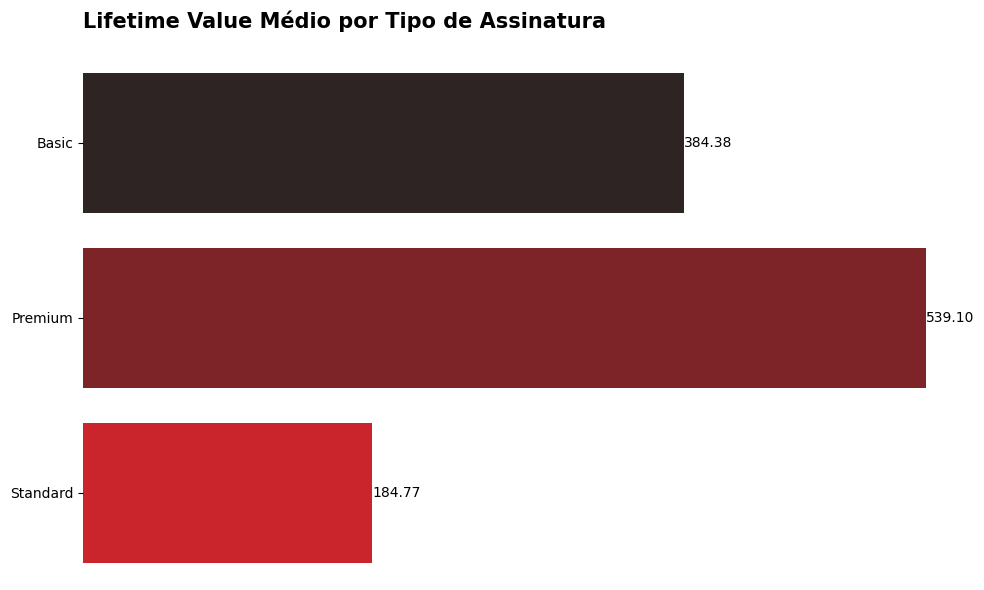

In [178]:
# Certifique-se de que os valores de 'Valor da assinatura/mês' estão no formato numérico
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)

# Calculando o LTV para cada usuário: LTV individual = Valor mensal * Meses Utilizados
df['LTV'] = df['Valor da assinatura/mês'] * df['Meses de Ultilizados']

# Calculando o LTV médio por tipo de assinatura
ltv_por_assinatura = df.groupby('Tipo de assinatura')['LTV'].mean()

# Configuração do gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ltv_por_assinatura.values, y=ltv_por_assinatura.index, hue=ltv_por_assinatura.index,
                 palette='dark:#e50914', dodge=False, legend=False)

# Ajustes de estilo
plt.title('Lifetime Value Médio por Tipo de Assinatura', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.xticks([])  # Remove os ticks do eixo x

# Adicionando rótulos de dados em cada barra
for i, v in enumerate(ltv_por_assinatura.values):
    ax.text(v, i, f"{v:.2f}", color='black', ha='left', va='center', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## 3.11 Life Time Value Médio por País

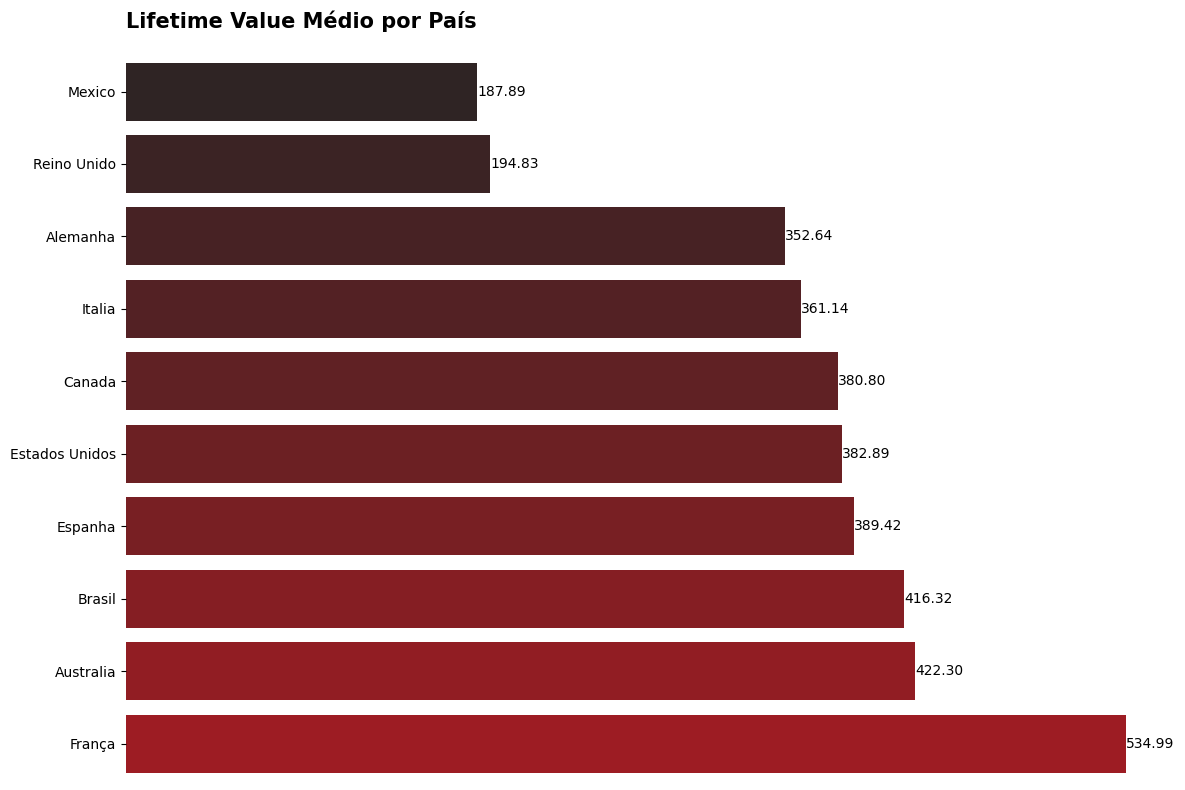

In [175]:
# Certifique-se de que os valores de 'Valor da assinatura/mês' estão no formato numérico
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)

# Calculando o LTV para cada usuário: LTV individual = Valor mensal * Meses Utilizados
df['LTV'] = df['Valor da assinatura/mês'] * df['Meses de Ultilizados']

# Calculando o LTV médio por país
ltv_por_pais = df.groupby('País')['LTV'].mean().sort_values()

# Configuração do gráfico
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=ltv_por_pais.values, y=ltv_por_pais.index, hue=ltv_por_pais.index, dodge=False, palette='dark:#b20710', legend=False)

# Ajustes de estilo e títulos
plt.title('Lifetime Value Médio por País', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.xticks([])  # Remove os ticks do eixo x

# Adicionando rótulos de dados em cada barra
for i, v in enumerate(ltv_por_pais.values):
    ax.text(v, i, f"{v:.2f}", color='black', ha='left', va='center', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## 3.12 Média de Meses de Utilização por País

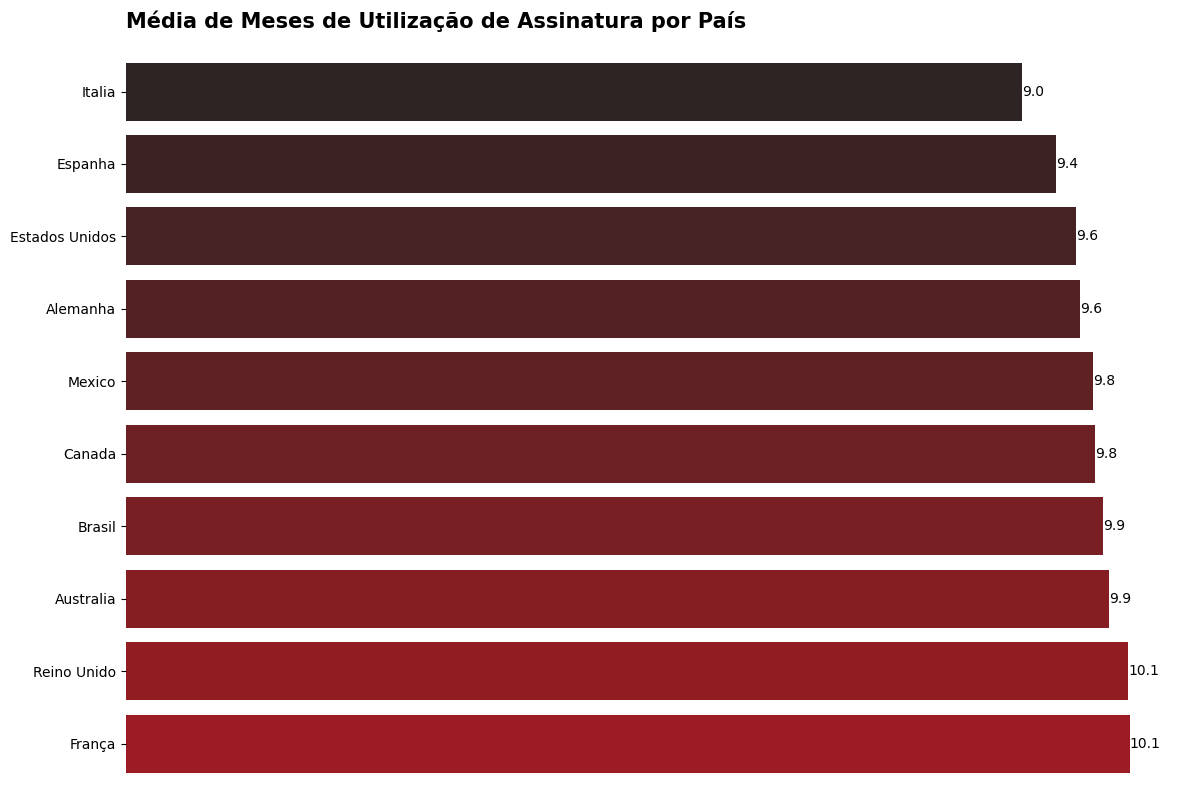

In [190]:
# Agrupar por país e calcular a média dos meses de utilização
country_duration_avg = df.groupby('País')['Meses de Ultilizados'].mean().sort_values()

# Configuração do gráfico no estilo desejado
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=country_duration_avg.values, y=country_duration_avg.index, hue=country_duration_avg.index, dodge=False, palette='dark:#b20710', legend=False)

# Ajustes de estilo e títulos
plt.title('Média de Meses de Utilização de Assinatura por País', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.xticks([])  # Remove os ticks do eixo x

# Adicionando rótulos de dados em cada barra
for i, v in enumerate(country_duration_avg.values):
    ax.text(v, i, f"{v:.1f}", color='black', ha='left', va='center', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## 3.13 Receita Total por País

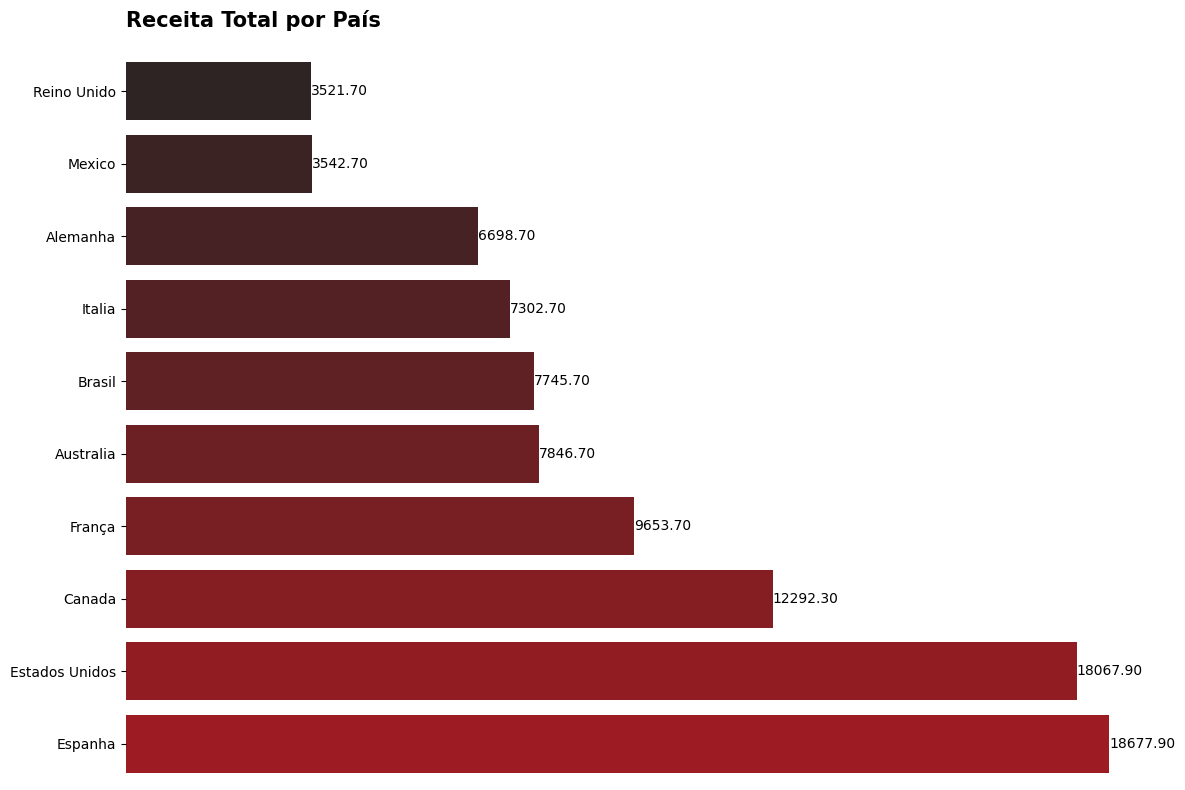

In [191]:
# Certifique-se de que os valores de 'Valor da assinatura/mês' estão no formato numérico
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)

# Calculando a receita total por país
receita_total_por_pais = df.groupby('País')['Valor da assinatura/mês'].sum().sort_values()

# Configuração do gráfico no estilo desejado
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=receita_total_por_pais.values, y=receita_total_por_pais.index, hue=receita_total_por_pais.index, dodge=False, palette='dark:#b20710', legend=False)

# Ajustes de estilo e títulos
plt.title('Receita Total por País', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.xticks([])  # Remove os ticks do eixo x

# Adicionando rótulos de dados em cada barra
for i, v in enumerate(receita_total_por_pais.values):
    ax.text(v, i, f"{v:.2f}", color='black', ha='left', va='center', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## 3.14 Receita Média Mensal por País

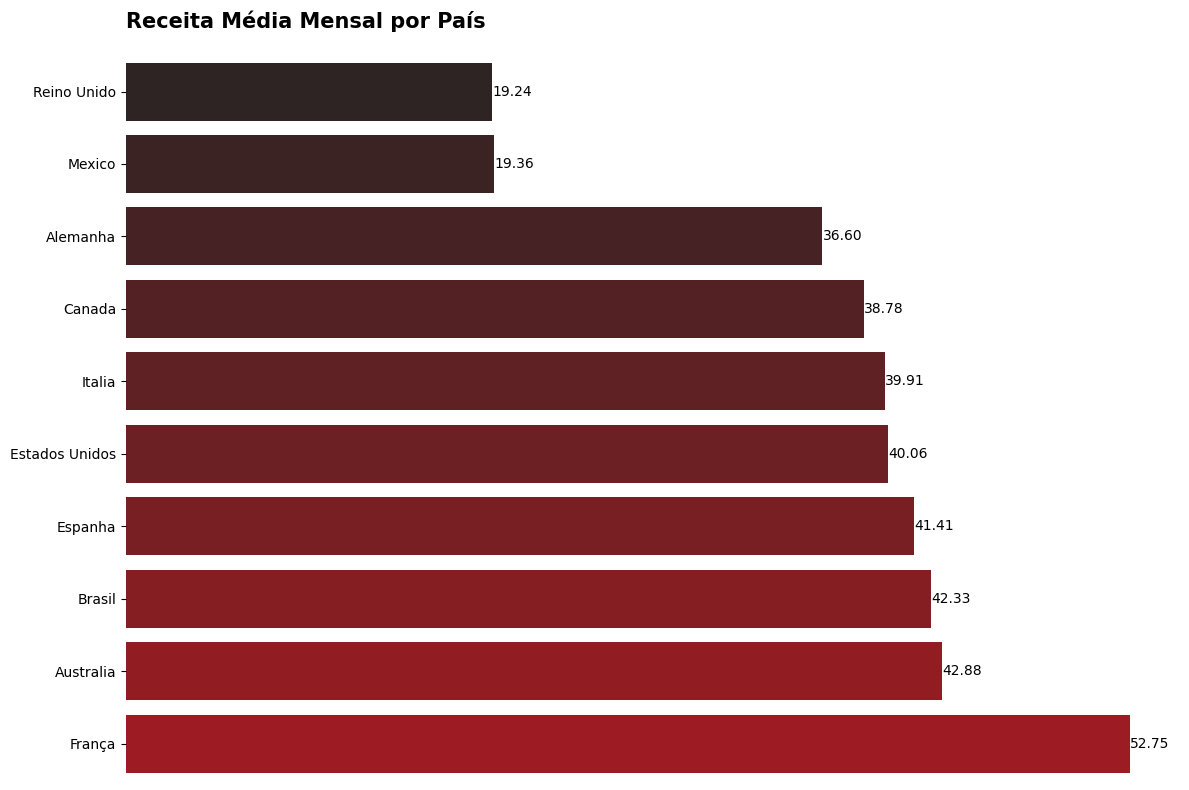

In [192]:
# Certifique-se de que os valores de 'Valor da assinatura/mês' estão no formato numérico
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)

# Calculando a receita média mensal por país
receita_mensal_media_por_pais = df.groupby('País')['Valor da assinatura/mês'].mean().sort_values()

# Configuração do gráfico no estilo desejado
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=receita_mensal_media_por_pais.values, y=receita_mensal_media_por_pais.index, hue=receita_mensal_media_por_pais.index, dodge=False, palette='dark:#b20710', legend=False)

# Ajustes de estilo e títulos
plt.title('Receita Média Mensal por País', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.xticks([])  # Remove os ticks do eixo x

# Adicionando rótulos de dados em cada barra
for i, v in enumerate(receita_mensal_media_por_pais.values):
    ax.text(v, i, f"{v:.2f}", color='black', ha='left', va='center', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## 3.15 Receita Média Mensal por Faixa Etária

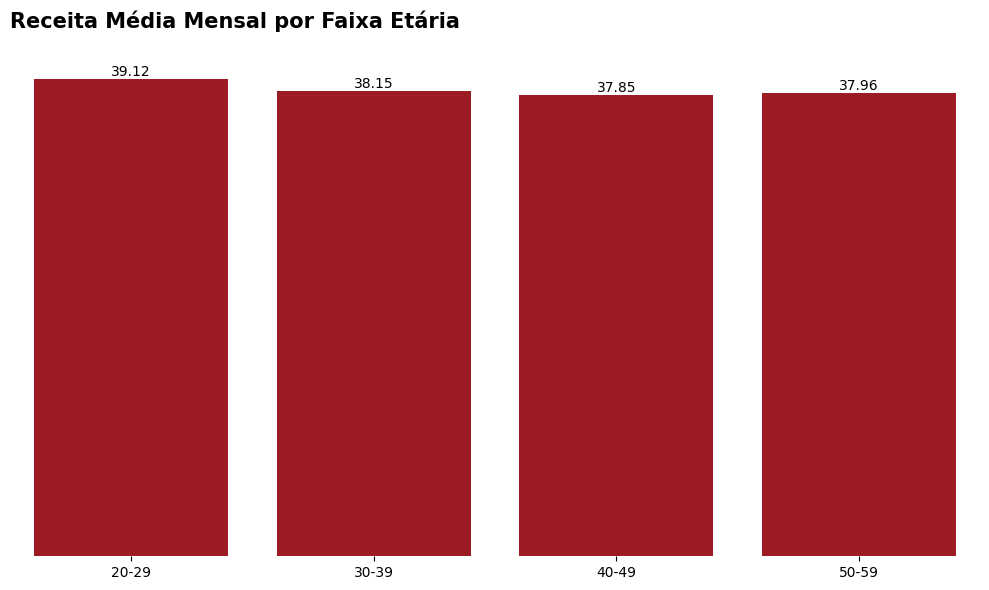

In [292]:
# Certifique-se de que os valores de 'Valor da assinatura/mês' e 'Idade' estão no formato numérico
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)
df['Idade'] = df['Idade'].astype(int)

# Criando as faixas etárias
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df['Faixa Etária'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Calculando a receita média mensal por faixa etária
receita_mensal_media_por_faixa = df.groupby('Faixa Etária', observed=True)['Valor da assinatura/mês'].mean().sort_index()

# Configuração do gráfico no estilo desejado
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=receita_mensal_media_por_faixa.index, y=receita_mensal_media_por_faixa.values)

# Ajustes de estilo e títulos
plt.title('Receita Média Mensal por Faixa Etária', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.ylabel('')
plt.yticks([])  # Remove os ticks do eixo y
plt.xlabel('')  # Adiciona o rótulo do eixo x

# Adicionando rótulos de dados em cada barra
for i, v in enumerate(receita_mensal_media_por_faixa.values):
    ax.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## 3.16 Life Time Value Médio por Faixa Etária

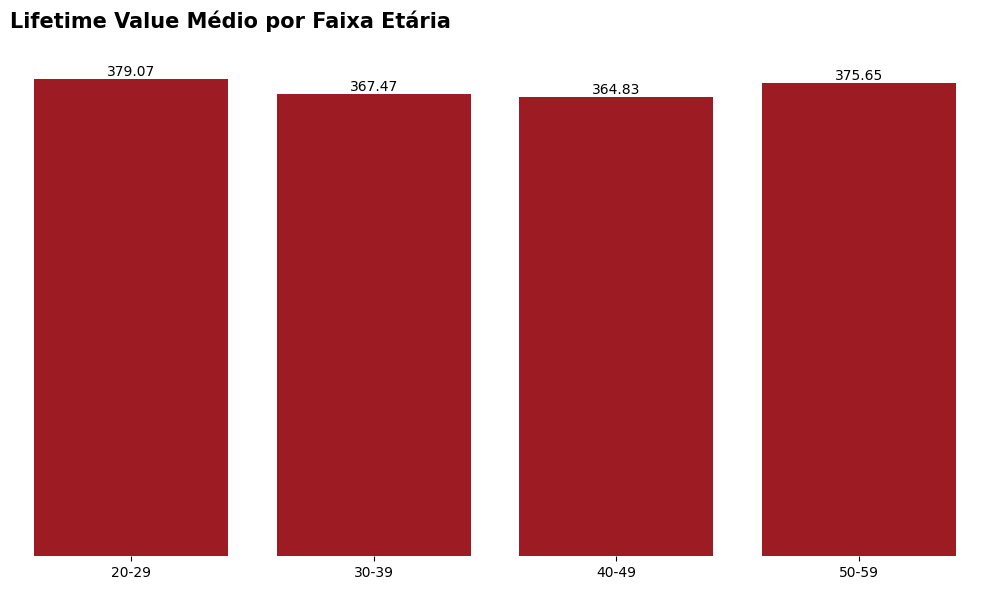

In [291]:
# Certifique-se de que os valores de 'Valor da assinatura/mês', 'Meses de Ultilizados', e 'Idade' estão no formato numérico
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)
df['Meses de Ultilizados'] = df['Meses de Ultilizados'].astype(int)
df['Idade'] = df['Idade'].astype(int)

# Criando as faixas etárias
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df['Faixa Etária'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Calculando o LTV para cada usuário: LTV individual = Valor mensal * Meses Utilizados
df['LTV'] = df['Valor da assinatura/mês'] * df['Meses de Ultilizados']

# Calculando o LTV médio por faixa etária
ltv_por_faixa_etaria = df.groupby('Faixa Etária', observed=True)['LTV'].mean().sort_index()

# Configuração do gráfico no estilo desejado
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=ltv_por_faixa_etaria.index,
    y=ltv_por_faixa_etaria.values,
    hue=None,
    dodge=False,
    legend=False
)

# Ajustes de estilo e títulos
plt.title('Lifetime Value Médio por Faixa Etária', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.ylabel('')
plt.yticks([])  # Remove os ticks do eixo y
plt.xlabel('')  # Adiciona o rótulo do eixo x

# Adicionando rótulos de dados em cada barra
for i, v in enumerate(ltv_por_faixa_etaria.values):
    ax.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## 3.17 Receita Total por Faixa Etária

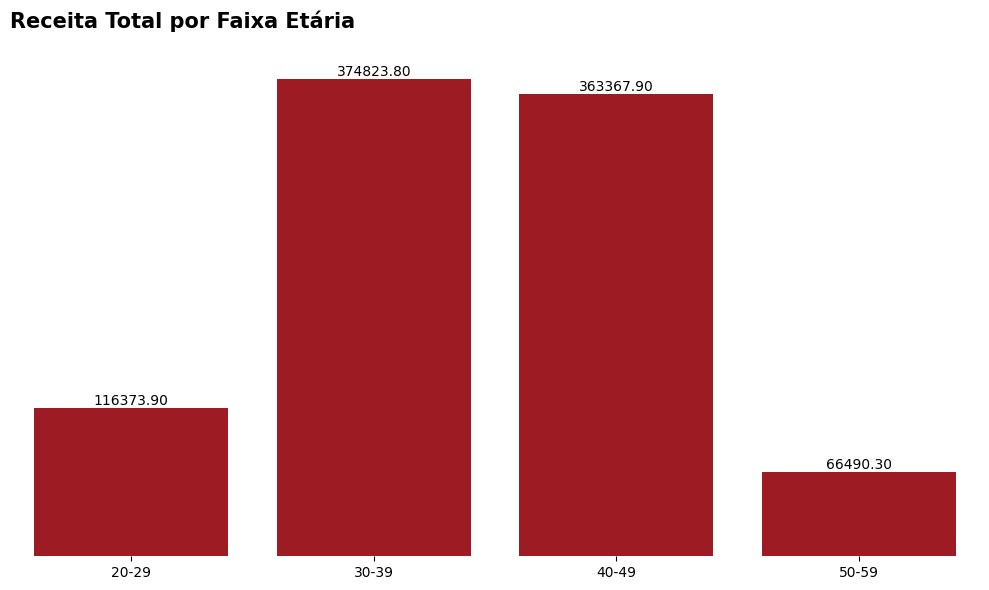

In [290]:
# Certifique-se de que os valores de 'Valor da assinatura/mês', 'Meses de Ultilizados', e 'Idade' estão no formato numérico
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)
df['Meses de Ultilizados'] = df['Meses de Ultilizados'].astype(int)
df['Idade'] = df['Idade'].astype(int)

# Criando as faixas etárias
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df['Faixa Etária'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Calculando a receita total para cada faixa etária: Receita total = Valor mensal * Meses Utilizados
df['Receita Total'] = df['Valor da assinatura/mês'] * df['Meses de Ultilizados']

# Agrupando e somando a receita total por faixa etária
receita_total_por_faixa = df.groupby('Faixa Etária', observed=True)['Receita Total'].sum().sort_index()

# Configuração do gráfico no estilo desejado
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=receita_total_por_faixa.index,
    y=receita_total_por_faixa.values,
    dodge=False
)

# Ajustes de estilo e títulos
plt.title('Receita Total por Faixa Etária', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('')
plt.ylabel('')  # Remove o rótulo do eixo y para simplificar
plt.yticks([])  # Remove os ticks do eixo y

# Adicionando rótulos de dados em cada barra
for i, v in enumerate(receita_total_por_faixa.values):
    ax.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## 3.18 Receita Total por Tipo de Assinatura

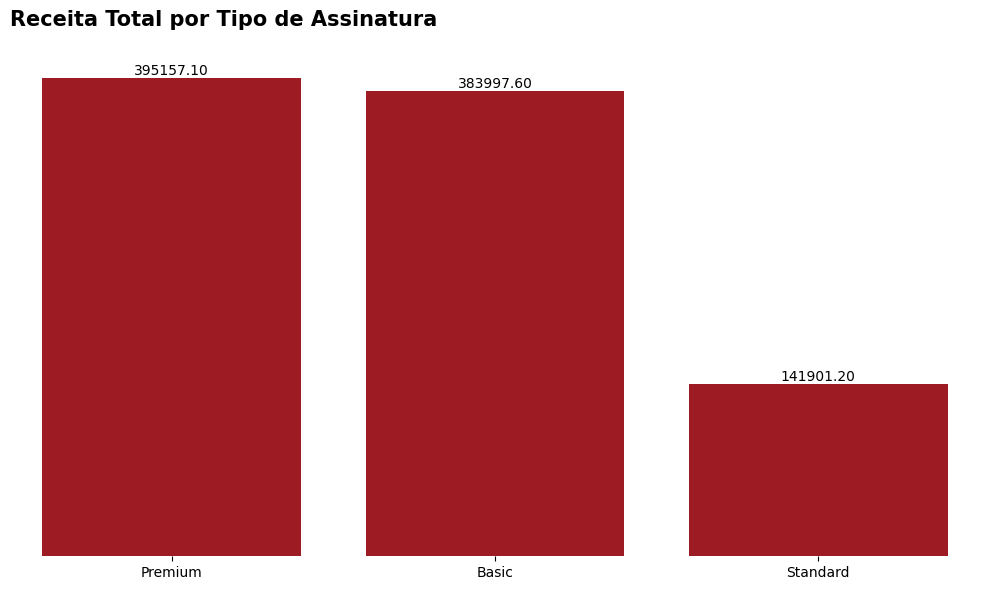

In [289]:
# Certifique-se de que os valores de 'Valor da assinatura/mês' e 'Meses de Ultilizados' estão no formato numérico
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)
df['Meses de Ultilizados'] = df['Meses de Ultilizados'].astype(int)

# Calculando a receita total para cada usuário: Receita total = Valor mensal * Meses Utilizados
df['Receita Total'] = df['Valor da assinatura/mês'] * df['Meses de Ultilizados']

# Agrupando e somando a receita total por tipo de assinatura
receita_total_por_assinatura = df.groupby('Tipo de assinatura')['Receita Total'].sum().sort_values(ascending=False)

# Configuração do gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=receita_total_por_assinatura.index,
    y=receita_total_por_assinatura.values,
)

# Ajustes de estilo e títulos
plt.title('Receita Total por Tipo de Assinatura', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.yticks([])  # Remove os ticks do eixo y

# Adicionando rótulos de dados em cada barra
for i, v in enumerate(receita_total_por_assinatura.values):
    ax.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## 3.19 Life Time Value Média por Tipo de Assinatura

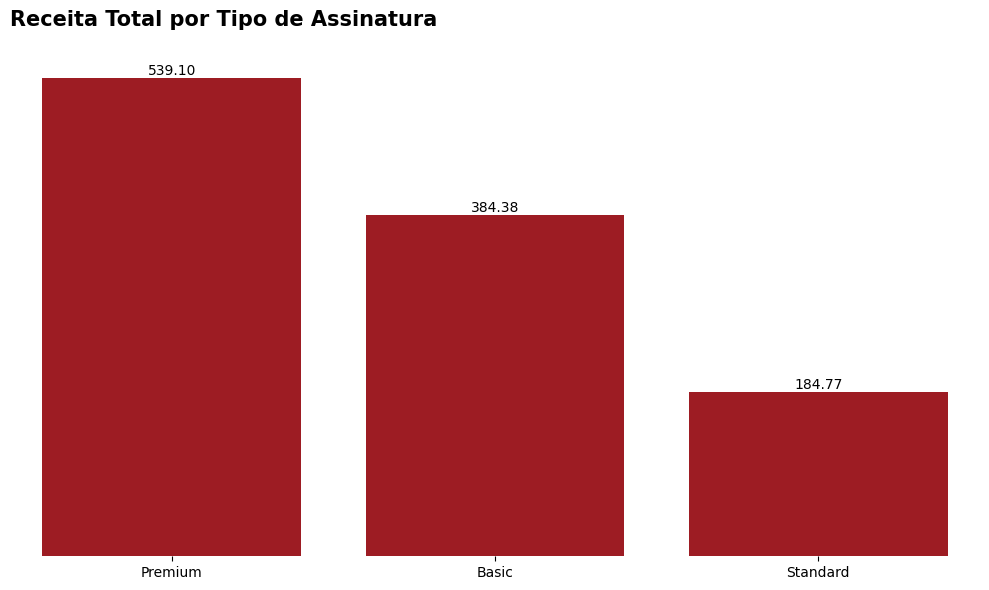

In [288]:
# Certifique-se de que os valores de 'Valor da assinatura/mês' e 'Meses de Ultilizados' estão no formato numérico
df['Valor da assinatura/mês'] = df['Valor da assinatura/mês'].astype(float)
df['Meses de Ultilizados'] = df['Meses de Ultilizados'].astype(int)

# Calculando o LTV para cada usuário: LTV individual = Valor mensal * Meses Utilizados
df['LTV'] = df['Valor da assinatura/mês'] * df['Meses de Ultilizados']

# Calculando o LTV médio por tipo de assinatura
ltv_por_assinatura = df.groupby('Tipo de assinatura')['LTV'].mean().sort_values(ascending=False)

# Configuração do gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=ltv_por_assinatura.index,
    y=ltv_por_assinatura.values,
)

# Ajustes de estilo e títulos
plt.title('Receita Total por Tipo de Assinatura', fontsize=15, fontweight='bold', loc='left', pad=20)
sns.despine(left=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.yticks([])  # Remove os ticks do eixo y


# Adicionando rótulos de dados em cada barra
for i, v in enumerate(ltv_por_assinatura.values):
    ax.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


# 4. Conclusão

**Key Insights**

- A princípio a análise revelou que os principais mercados da Netflix são compostos por uma base adulta, com preferência por planos mais acessíveis, como o Básico. Há uma uniformidade na distribuição de gênero e tipo de assinatura, o que sugere que as preferências dos usuários são bastante consistentes.

**Próximos Passos:**

- Storytelling dos Dados: Com base nesses insights, o próximo passo é desenvolver um data storytelling para ajudar a guiar as estratégias de marketing para atrais mais assinantes e expandir a atuação em novos mercados.

**Dificuldades encontradas**:

- A ausência de informações adicionais sobre o comportamento dos usuários (como tempo de visualização ou preferências de conteúdo) limitou a profundidade da análise.
- A análise não levou em conta aspectos culturais que podem influenciar o uso da plataforma em diferentes países.